# Diabetes prediction dataset
kaggle - https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# IMPORTANDO A BASE DE DADOS

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# VISUALIZAÇÃO DOS DADOS

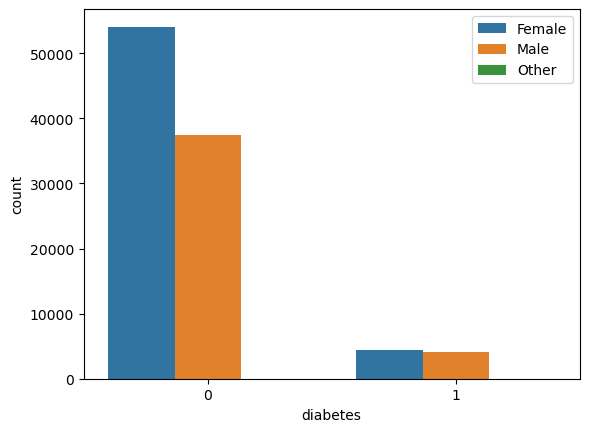

In [5]:
sns.countplot(x = df['diabetes'], hue = df['gender'])
plt.legend(loc = 'upper right')

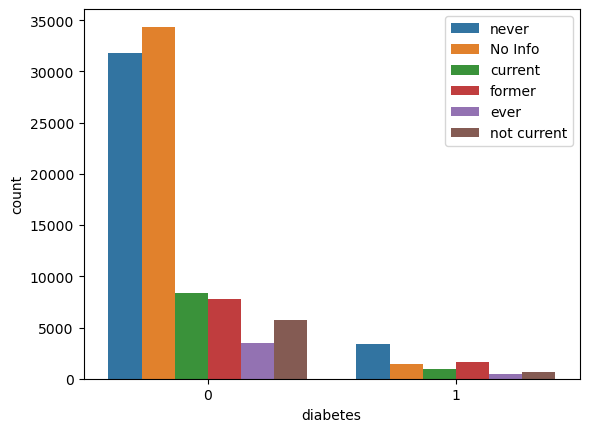

In [6]:
sns.countplot(x = df['diabetes'], hue = df['smoking_history'])
plt.legend(loc = 'upper right')

In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [9]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

# APLICANDO ONE HOT ENCODER

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['gender', 'smoking_history'])],
                       remainder='passthrough')
x = ct.fit_transform(x)

# BALANCEAMENTO DE AMOSTRAS

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [12]:
yi = y.astype(int)
np.bincount(yi)

array([91500, 91500], dtype=int64)

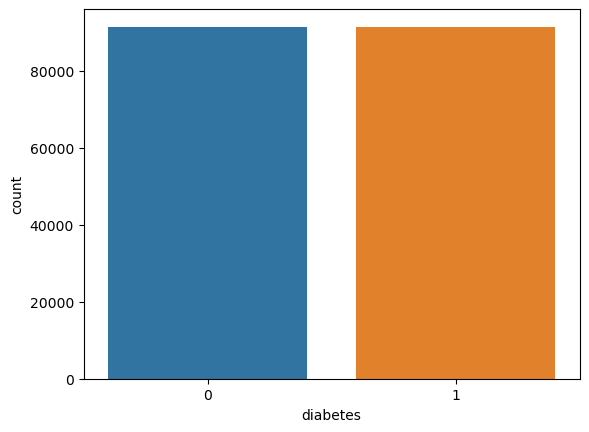

In [13]:
ax = sns.countplot(x=yi)

# CONJUNTO DE TREINO E TESTE

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# NORMALIZANDO OS DADOS

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[ 0.39271482, -0.39250795, -0.01012272, ..., -0.37176282,
         1.6779857 , -0.32513905],
       [ 0.93793498, -0.93774267, -0.01012272, ..., -0.81788665,
        -0.28051208, -0.06196041],
       [ 0.93793498, -0.93774267, -0.01012272, ...,  0.83961263,
         0.4739233 , -0.07950566],
       ...,
       [ 0.76112209, -0.76092506, -0.01012272, ...,  1.19895061,
         0.03233   ,  1.34165897],
       [ 0.93793498, -0.93774267, -0.01012272, ...,  0.24523715,
         0.37232051, -1.4655798 ],
       [ 0.93793498, -0.93774267, -0.01012272, ...,  0.69104803,
         0.83123792, -0.14968663]])

# Algoritmo KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=4).fit(x_train, y_train)

y_predKNN = KNN.predict(x_test)

C:\Users\douglas.silva\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Acurácia do modelo KNN

In [17]:
from sklearn.metrics import accuracy_score

accKNN = accuracy_score(y_test, y_predKNN)
accKNN

0.9596994535519126

# Algoritmo DECISION TREE

In [18]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)

y_predTree = Tree.predict(x_test)

## Acurácia do modelo Decision Tree

In [19]:
accTree = accuracy_score(y_test, y_predTree)
accTree

0.8999180327868852

# Algoritmo RANDOM FOREST

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=5).fit(x_train, y_train)

y_predRF = RF.predict(x_test)

## Acurácia do modelo Random Forest

In [21]:
accRF = accuracy_score(y_test, y_predRF)
accRF

0.9407650273224044

# Algoritmo LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(x_train, y_train)

y_predLR = LR.predict(x_test)

## Acurácia do modelo Logistic Regression

In [23]:
accLR = accuracy_score(y_test, y_predLR)
accLR

0.8912568306010928

# PERCEPTRON

In [24]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Ppn = Perceptron(max_iter=1000, eta0=0.15)
Ppn.fit(x_train, y_train)

y_predPpn = Ppn.predict(x_test)

## Acurácia do modelo Perceptron

In [25]:
confusion_matrix(y_test, y_predPpn)

array([[16238,  2101],
       [ 2858, 15403]], dtype=int64)

C:\Users\douglas.silva\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


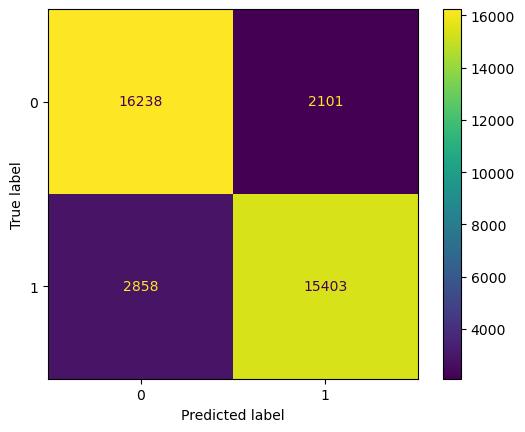

In [26]:
plot_confusion_matrix(Ppn, x_test, y_test)

In [27]:
accuracy_score(y_test, y_predPpn)

0.8645081967213115

# ARQUITETURA DA REDE NEURAL MLP

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# PERCEPTRON MULTICAMADAS (REDE NEURAL MLP)

In [30]:
def create_model(optimizer='adam'):
    ann = Sequential()
    ann.add(Dense(units=6, activation='relu', kernel_initializer='he_normal'))
    ann.add(Dense(units=6, activation='relu', kernel_initializer='he_normal'))
    ann.add(Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return ann

In [31]:
model = KerasClassifier(build_fn=create_model, verbose=2)

C:\Users\douglas.silva\AppData\Local\Temp\ipykernel_14148\2575944917.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=2)


## GridSearch na MLP

In [34]:
# definição dos parâmetros da Grid Search
from sklearn.model_selection import GridSearchCV

optimizer = ['SGD', 'Adam']
batch_size = [16, 32, 64]
epochs = [200, 400]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None, cv=2)
grid_result = grid.fit(x_train, y_train)

Epoch 1/200
4575/4575 - 3s - loss: 0.3125 - accuracy: 0.8546 - 3s/epoch - 730us/step
Epoch 2/200
4575/4575 - 3s - loss: 0.2352 - accuracy: 0.8954 - 3s/epoch - 665us/step
Epoch 3/200
4575/4575 - 3s - loss: 0.2287 - accuracy: 0.8978 - 3s/epoch - 657us/step
Epoch 4/200
4575/4575 - 3s - loss: 0.2212 - accuracy: 0.9003 - 3s/epoch - 654us/step
Epoch 5/200
4575/4575 - 3s - loss: 0.2134 - accuracy: 0.9047 - 3s/epoch - 645us/step
Epoch 6/200
4575/4575 - 3s - loss: 0.2071 - accuracy: 0.9063 - 3s/epoch - 660us/step
Epoch 7/200
4575/4575 - 3s - loss: 0.2017 - accuracy: 0.9088 - 3s/epoch - 663us/step
Epoch 8/200
4575/4575 - 3s - loss: 0.1975 - accuracy: 0.9116 - 3s/epoch - 655us/step
Epoch 9/200
4575/4575 - 3s - loss: 0.1939 - accuracy: 0.9132 - 3s/epoch - 646us/step
Epoch 10/200
4575/4575 - 3s - loss: 0.1904 - accuracy: 0.9152 - 3s/epoch - 657us/step
Epoch 11/200
4575/4575 - 3s - loss: 0.1874 - accuracy: 0.9164 - 3s/epoch - 667us/step
Epoch 12/200
4575/4575 - 3s - loss: 0.1838 - accuracy: 0.9174 -

Epoch 97/200
4575/4575 - 3s - loss: 0.1433 - accuracy: 0.9359 - 3s/epoch - 666us/step
Epoch 98/200
4575/4575 - 3s - loss: 0.1434 - accuracy: 0.9367 - 3s/epoch - 676us/step
Epoch 99/200
4575/4575 - 3s - loss: 0.1431 - accuracy: 0.9363 - 3s/epoch - 671us/step
Epoch 100/200
4575/4575 - 3s - loss: 0.1433 - accuracy: 0.9363 - 3s/epoch - 665us/step
Epoch 101/200
4575/4575 - 3s - loss: 0.1428 - accuracy: 0.9361 - 3s/epoch - 672us/step
Epoch 102/200
4575/4575 - 3s - loss: 0.1433 - accuracy: 0.9361 - 3s/epoch - 691us/step
Epoch 103/200
4575/4575 - 3s - loss: 0.1432 - accuracy: 0.9363 - 3s/epoch - 680us/step
Epoch 104/200
4575/4575 - 3s - loss: 0.1426 - accuracy: 0.9361 - 3s/epoch - 690us/step
Epoch 105/200
4575/4575 - 3s - loss: 0.1425 - accuracy: 0.9368 - 3s/epoch - 675us/step
Epoch 106/200
4575/4575 - 3s - loss: 0.1429 - accuracy: 0.9363 - 3s/epoch - 680us/step
Epoch 107/200
4575/4575 - 3s - loss: 0.1426 - accuracy: 0.9365 - 3s/epoch - 690us/step
Epoch 108/200
4575/4575 - 3s - loss: 0.1429 - 

Epoch 192/200
4575/4575 - 3s - loss: 0.1383 - accuracy: 0.9388 - 3s/epoch - 677us/step
Epoch 193/200
4575/4575 - 3s - loss: 0.1389 - accuracy: 0.9384 - 3s/epoch - 674us/step
Epoch 194/200
4575/4575 - 3s - loss: 0.1386 - accuracy: 0.9386 - 3s/epoch - 665us/step
Epoch 195/200
4575/4575 - 3s - loss: 0.1381 - accuracy: 0.9387 - 3s/epoch - 664us/step
Epoch 196/200
4575/4575 - 3s - loss: 0.1381 - accuracy: 0.9387 - 3s/epoch - 665us/step
Epoch 197/200
4575/4575 - 3s - loss: 0.1382 - accuracy: 0.9382 - 3s/epoch - 666us/step
Epoch 198/200
4575/4575 - 3s - loss: 0.1377 - accuracy: 0.9397 - 3s/epoch - 666us/step
Epoch 199/200
4575/4575 - 3s - loss: 0.1387 - accuracy: 0.9374 - 3s/epoch - 665us/step
Epoch 200/200
4575/4575 - 3s - loss: 0.1382 - accuracy: 0.9391 - 3s/epoch - 669us/step
4575/4575 - 3s - loss: 0.1377 - accuracy: 0.9382 - 3s/epoch - 597us/step
Epoch 1/200
4575/4575 - 3s - loss: 0.3767 - accuracy: 0.8131 - 3s/epoch - 735us/step
Epoch 2/200
4575/4575 - 3s - loss: 0.2463 - accuracy: 0.888

Epoch 87/200
4575/4575 - 3s - loss: 0.1501 - accuracy: 0.9287 - 3s/epoch - 684us/step
Epoch 88/200
4575/4575 - 3s - loss: 0.1501 - accuracy: 0.9283 - 3s/epoch - 670us/step
Epoch 89/200
4575/4575 - 3s - loss: 0.1499 - accuracy: 0.9287 - 3s/epoch - 660us/step
Epoch 90/200
4575/4575 - 3s - loss: 0.1497 - accuracy: 0.9285 - 3s/epoch - 669us/step
Epoch 91/200
4575/4575 - 3s - loss: 0.1499 - accuracy: 0.9287 - 3s/epoch - 664us/step
Epoch 92/200
4575/4575 - 3s - loss: 0.1496 - accuracy: 0.9293 - 3s/epoch - 667us/step
Epoch 93/200
4575/4575 - 3s - loss: 0.1499 - accuracy: 0.9289 - 3s/epoch - 662us/step
Epoch 94/200
4575/4575 - 3s - loss: 0.1499 - accuracy: 0.9289 - 3s/epoch - 664us/step
Epoch 95/200
4575/4575 - 3s - loss: 0.1498 - accuracy: 0.9299 - 3s/epoch - 673us/step
Epoch 96/200
4575/4575 - 3s - loss: 0.1493 - accuracy: 0.9289 - 3s/epoch - 666us/step
Epoch 97/200
4575/4575 - 3s - loss: 0.1493 - accuracy: 0.9289 - 3s/epoch - 662us/step
Epoch 98/200
4575/4575 - 3s - loss: 0.1493 - accuracy:

Epoch 182/200
4575/4575 - 3s - loss: 0.1404 - accuracy: 0.9334 - 3s/epoch - 669us/step
Epoch 183/200
4575/4575 - 3s - loss: 0.1404 - accuracy: 0.9320 - 3s/epoch - 656us/step
Epoch 184/200
4575/4575 - 3s - loss: 0.1404 - accuracy: 0.9326 - 3s/epoch - 660us/step
Epoch 185/200
4575/4575 - 3s - loss: 0.1403 - accuracy: 0.9330 - 3s/epoch - 653us/step
Epoch 186/200
4575/4575 - 3s - loss: 0.1399 - accuracy: 0.9325 - 3s/epoch - 658us/step
Epoch 187/200
4575/4575 - 3s - loss: 0.1399 - accuracy: 0.9329 - 3s/epoch - 654us/step
Epoch 188/200
4575/4575 - 3s - loss: 0.1401 - accuracy: 0.9330 - 3s/epoch - 673us/step
Epoch 189/200
4575/4575 - 3s - loss: 0.1401 - accuracy: 0.9324 - 3s/epoch - 659us/step
Epoch 190/200
4575/4575 - 3s - loss: 0.1396 - accuracy: 0.9326 - 3s/epoch - 670us/step
Epoch 191/200
4575/4575 - 3s - loss: 0.1394 - accuracy: 0.9331 - 3s/epoch - 666us/step
Epoch 192/200
4575/4575 - 3s - loss: 0.1401 - accuracy: 0.9336 - 3s/epoch - 662us/step
Epoch 193/200
4575/4575 - 3s - loss: 0.1400

Epoch 77/200
4575/4575 - 3s - loss: 0.1445 - accuracy: 0.9343 - 3s/epoch - 682us/step
Epoch 78/200
4575/4575 - 3s - loss: 0.1445 - accuracy: 0.9342 - 3s/epoch - 693us/step
Epoch 79/200
4575/4575 - 3s - loss: 0.1447 - accuracy: 0.9347 - 3s/epoch - 679us/step
Epoch 80/200
4575/4575 - 3s - loss: 0.1442 - accuracy: 0.9348 - 3s/epoch - 691us/step
Epoch 81/200
4575/4575 - 3s - loss: 0.1447 - accuracy: 0.9342 - 3s/epoch - 686us/step
Epoch 82/200
4575/4575 - 3s - loss: 0.1442 - accuracy: 0.9336 - 3s/epoch - 694us/step
Epoch 83/200
4575/4575 - 3s - loss: 0.1446 - accuracy: 0.9341 - 3s/epoch - 691us/step
Epoch 84/200
4575/4575 - 3s - loss: 0.1444 - accuracy: 0.9338 - 3s/epoch - 689us/step
Epoch 85/200
4575/4575 - 3s - loss: 0.1443 - accuracy: 0.9343 - 3s/epoch - 687us/step
Epoch 86/200
4575/4575 - 3s - loss: 0.1440 - accuracy: 0.9341 - 3s/epoch - 689us/step
Epoch 87/200
4575/4575 - 3s - loss: 0.1445 - accuracy: 0.9344 - 3s/epoch - 661us/step
Epoch 88/200
4575/4575 - 3s - loss: 0.1439 - accuracy:

Epoch 172/200
4575/4575 - 3s - loss: 0.1419 - accuracy: 0.9352 - 3s/epoch - 683us/step
Epoch 173/200
4575/4575 - 3s - loss: 0.1416 - accuracy: 0.9356 - 3s/epoch - 683us/step
Epoch 174/200
4575/4575 - 3s - loss: 0.1417 - accuracy: 0.9357 - 3s/epoch - 676us/step
Epoch 175/200
4575/4575 - 3s - loss: 0.1416 - accuracy: 0.9357 - 3s/epoch - 689us/step
Epoch 176/200
4575/4575 - 3s - loss: 0.1415 - accuracy: 0.9356 - 3s/epoch - 698us/step
Epoch 177/200
4575/4575 - 3s - loss: 0.1416 - accuracy: 0.9348 - 3s/epoch - 693us/step
Epoch 178/200
4575/4575 - 3s - loss: 0.1420 - accuracy: 0.9351 - 3s/epoch - 691us/step
Epoch 179/200
4575/4575 - 3s - loss: 0.1418 - accuracy: 0.9353 - 3s/epoch - 687us/step
Epoch 180/200
4575/4575 - 3s - loss: 0.1416 - accuracy: 0.9359 - 3s/epoch - 689us/step
Epoch 181/200
4575/4575 - 3s - loss: 0.1411 - accuracy: 0.9357 - 3s/epoch - 692us/step
Epoch 182/200
4575/4575 - 3s - loss: 0.1414 - accuracy: 0.9355 - 3s/epoch - 671us/step
Epoch 183/200
4575/4575 - 3s - loss: 0.1414

Epoch 67/200
4575/4575 - 3s - loss: 0.1504 - accuracy: 0.9307 - 3s/epoch - 696us/step
Epoch 68/200
4575/4575 - 3s - loss: 0.1504 - accuracy: 0.9300 - 3s/epoch - 706us/step
Epoch 69/200
4575/4575 - 3s - loss: 0.1506 - accuracy: 0.9306 - 3s/epoch - 692us/step
Epoch 70/200
4575/4575 - 3s - loss: 0.1506 - accuracy: 0.9307 - 3s/epoch - 697us/step
Epoch 71/200
4575/4575 - 3s - loss: 0.1509 - accuracy: 0.9308 - 3s/epoch - 709us/step
Epoch 72/200
4575/4575 - 3s - loss: 0.1502 - accuracy: 0.9306 - 3s/epoch - 709us/step
Epoch 73/200
4575/4575 - 3s - loss: 0.1502 - accuracy: 0.9306 - 3s/epoch - 710us/step
Epoch 74/200
4575/4575 - 3s - loss: 0.1500 - accuracy: 0.9309 - 3s/epoch - 709us/step
Epoch 75/200
4575/4575 - 3s - loss: 0.1503 - accuracy: 0.9312 - 3s/epoch - 708us/step
Epoch 76/200
4575/4575 - 3s - loss: 0.1503 - accuracy: 0.9310 - 3s/epoch - 687us/step
Epoch 77/200
4575/4575 - 3s - loss: 0.1504 - accuracy: 0.9305 - 3s/epoch - 710us/step
Epoch 78/200
4575/4575 - 3s - loss: 0.1503 - accuracy:

Epoch 162/200
4575/4575 - 4s - loss: 0.1482 - accuracy: 0.9315 - 4s/epoch - 828us/step
Epoch 163/200
4575/4575 - 4s - loss: 0.1483 - accuracy: 0.9310 - 4s/epoch - 816us/step
Epoch 164/200
4575/4575 - 3s - loss: 0.1484 - accuracy: 0.9305 - 3s/epoch - 711us/step
Epoch 165/200
4575/4575 - 3s - loss: 0.1484 - accuracy: 0.9318 - 3s/epoch - 705us/step
Epoch 166/200
4575/4575 - 3s - loss: 0.1483 - accuracy: 0.9317 - 3s/epoch - 750us/step
Epoch 167/200
4575/4575 - 3s - loss: 0.1479 - accuracy: 0.9327 - 3s/epoch - 710us/step
Epoch 168/200
4575/4575 - 3s - loss: 0.1484 - accuracy: 0.9312 - 3s/epoch - 723us/step
Epoch 169/200
4575/4575 - 4s - loss: 0.1477 - accuracy: 0.9326 - 4s/epoch - 859us/step
Epoch 170/200
4575/4575 - 3s - loss: 0.1484 - accuracy: 0.9313 - 3s/epoch - 724us/step
Epoch 171/200
4575/4575 - 4s - loss: 0.1481 - accuracy: 0.9311 - 4s/epoch - 806us/step
Epoch 172/200
4575/4575 - 3s - loss: 0.1485 - accuracy: 0.9316 - 3s/epoch - 728us/step
Epoch 173/200
4575/4575 - 3s - loss: 0.1481

4575/4575 - 3s - loss: 0.1522 - accuracy: 0.9346 - 3s/epoch - 664us/step
Epoch 57/400
4575/4575 - 3s - loss: 0.1526 - accuracy: 0.9340 - 3s/epoch - 654us/step
Epoch 58/400
4575/4575 - 3s - loss: 0.1518 - accuracy: 0.9344 - 3s/epoch - 672us/step
Epoch 59/400
4575/4575 - 3s - loss: 0.1515 - accuracy: 0.9346 - 3s/epoch - 657us/step
Epoch 60/400
4575/4575 - 3s - loss: 0.1512 - accuracy: 0.9346 - 3s/epoch - 660us/step
Epoch 61/400
4575/4575 - 3s - loss: 0.1512 - accuracy: 0.9353 - 3s/epoch - 657us/step
Epoch 62/400
4575/4575 - 3s - loss: 0.1506 - accuracy: 0.9348 - 3s/epoch - 653us/step
Epoch 63/400
4575/4575 - 3s - loss: 0.1501 - accuracy: 0.9355 - 3s/epoch - 664us/step
Epoch 64/400
4575/4575 - 3s - loss: 0.1504 - accuracy: 0.9349 - 3s/epoch - 657us/step
Epoch 65/400
4575/4575 - 3s - loss: 0.1495 - accuracy: 0.9344 - 3s/epoch - 656us/step
Epoch 66/400
4575/4575 - 3s - loss: 0.1493 - accuracy: 0.9361 - 3s/epoch - 656us/step
Epoch 67/400
4575/4575 - 3s - loss: 0.1497 - accuracy: 0.9348 - 3s/

Epoch 151/400
4575/4575 - 3s - loss: 0.1427 - accuracy: 0.9388 - 3s/epoch - 653us/step
Epoch 152/400
4575/4575 - 3s - loss: 0.1429 - accuracy: 0.9383 - 3s/epoch - 658us/step
Epoch 153/400
4575/4575 - 3s - loss: 0.1429 - accuracy: 0.9387 - 3s/epoch - 675us/step
Epoch 154/400
4575/4575 - 3s - loss: 0.1423 - accuracy: 0.9386 - 3s/epoch - 659us/step
Epoch 155/400
4575/4575 - 3s - loss: 0.1420 - accuracy: 0.9392 - 3s/epoch - 666us/step
Epoch 156/400
4575/4575 - 3s - loss: 0.1416 - accuracy: 0.9393 - 3s/epoch - 670us/step
Epoch 157/400
4575/4575 - 3s - loss: 0.1423 - accuracy: 0.9383 - 3s/epoch - 696us/step
Epoch 158/400
4575/4575 - 3s - loss: 0.1418 - accuracy: 0.9391 - 3s/epoch - 675us/step
Epoch 159/400
4575/4575 - 3s - loss: 0.1420 - accuracy: 0.9384 - 3s/epoch - 668us/step
Epoch 160/400
4575/4575 - 3s - loss: 0.1418 - accuracy: 0.9388 - 3s/epoch - 678us/step
Epoch 161/400
4575/4575 - 3s - loss: 0.1419 - accuracy: 0.9384 - 3s/epoch - 659us/step
Epoch 162/400
4575/4575 - 3s - loss: 0.1417

Epoch 246/400
4575/4575 - 3s - loss: 0.1383 - accuracy: 0.9404 - 3s/epoch - 669us/step
Epoch 247/400
4575/4575 - 3s - loss: 0.1383 - accuracy: 0.9406 - 3s/epoch - 666us/step
Epoch 248/400
4575/4575 - 3s - loss: 0.1380 - accuracy: 0.9403 - 3s/epoch - 660us/step
Epoch 249/400
4575/4575 - 3s - loss: 0.1384 - accuracy: 0.9405 - 3s/epoch - 666us/step
Epoch 250/400
4575/4575 - 3s - loss: 0.1378 - accuracy: 0.9401 - 3s/epoch - 670us/step
Epoch 251/400
4575/4575 - 3s - loss: 0.1377 - accuracy: 0.9406 - 3s/epoch - 671us/step
Epoch 252/400
4575/4575 - 3s - loss: 0.1379 - accuracy: 0.9410 - 3s/epoch - 656us/step
Epoch 253/400
4575/4575 - 3s - loss: 0.1380 - accuracy: 0.9411 - 3s/epoch - 666us/step
Epoch 254/400
4575/4575 - 3s - loss: 0.1379 - accuracy: 0.9404 - 3s/epoch - 664us/step
Epoch 255/400
4575/4575 - 3s - loss: 0.1373 - accuracy: 0.9408 - 3s/epoch - 673us/step
Epoch 256/400
4575/4575 - 3s - loss: 0.1378 - accuracy: 0.9408 - 3s/epoch - 667us/step
Epoch 257/400
4575/4575 - 3s - loss: 0.1379

Epoch 341/400
4575/4575 - 3s - loss: 0.1363 - accuracy: 0.9414 - 3s/epoch - 665us/step
Epoch 342/400
4575/4575 - 3s - loss: 0.1362 - accuracy: 0.9415 - 3s/epoch - 667us/step
Epoch 343/400
4575/4575 - 3s - loss: 0.1361 - accuracy: 0.9419 - 3s/epoch - 668us/step
Epoch 344/400
4575/4575 - 3s - loss: 0.1360 - accuracy: 0.9411 - 3s/epoch - 665us/step
Epoch 345/400
4575/4575 - 3s - loss: 0.1362 - accuracy: 0.9410 - 3s/epoch - 671us/step
Epoch 346/400
4575/4575 - 3s - loss: 0.1363 - accuracy: 0.9414 - 3s/epoch - 671us/step
Epoch 347/400
4575/4575 - 3s - loss: 0.1361 - accuracy: 0.9413 - 3s/epoch - 658us/step
Epoch 348/400
4575/4575 - 3s - loss: 0.1366 - accuracy: 0.9411 - 3s/epoch - 660us/step
Epoch 349/400
4575/4575 - 3s - loss: 0.1365 - accuracy: 0.9414 - 3s/epoch - 660us/step
Epoch 350/400
4575/4575 - 3s - loss: 0.1366 - accuracy: 0.9417 - 3s/epoch - 657us/step
Epoch 351/400
4575/4575 - 3s - loss: 0.1362 - accuracy: 0.9419 - 3s/epoch - 672us/step
Epoch 352/400
4575/4575 - 3s - loss: 0.1360

Epoch 35/400
4575/4575 - 3s - loss: 0.1642 - accuracy: 0.9261 - 3s/epoch - 700us/step
Epoch 36/400
4575/4575 - 4s - loss: 0.1643 - accuracy: 0.9254 - 4s/epoch - 808us/step
Epoch 37/400
4575/4575 - 3s - loss: 0.1644 - accuracy: 0.9258 - 3s/epoch - 754us/step
Epoch 38/400
4575/4575 - 3s - loss: 0.1633 - accuracy: 0.9272 - 3s/epoch - 695us/step
Epoch 39/400
4575/4575 - 3s - loss: 0.1635 - accuracy: 0.9272 - 3s/epoch - 676us/step
Epoch 40/400
4575/4575 - 3s - loss: 0.1639 - accuracy: 0.9266 - 3s/epoch - 693us/step
Epoch 41/400
4575/4575 - 3s - loss: 0.1627 - accuracy: 0.9266 - 3s/epoch - 665us/step
Epoch 42/400
4575/4575 - 3s - loss: 0.1633 - accuracy: 0.9258 - 3s/epoch - 687us/step
Epoch 43/400
4575/4575 - 3s - loss: 0.1628 - accuracy: 0.9264 - 3s/epoch - 670us/step
Epoch 44/400
4575/4575 - 3s - loss: 0.1626 - accuracy: 0.9273 - 3s/epoch - 664us/step
Epoch 45/400
4575/4575 - 3s - loss: 0.1625 - accuracy: 0.9266 - 3s/epoch - 640us/step
Epoch 46/400
4575/4575 - 3s - loss: 0.1624 - accuracy:

Epoch 130/400
4575/4575 - 3s - loss: 0.1551 - accuracy: 0.9298 - 3s/epoch - 665us/step
Epoch 131/400
4575/4575 - 3s - loss: 0.1554 - accuracy: 0.9299 - 3s/epoch - 666us/step
Epoch 132/400
4575/4575 - 3s - loss: 0.1554 - accuracy: 0.9300 - 3s/epoch - 658us/step
Epoch 133/400
4575/4575 - 3s - loss: 0.1554 - accuracy: 0.9298 - 3s/epoch - 664us/step
Epoch 134/400
4575/4575 - 3s - loss: 0.1547 - accuracy: 0.9305 - 3s/epoch - 689us/step
Epoch 135/400
4575/4575 - 3s - loss: 0.1547 - accuracy: 0.9306 - 3s/epoch - 665us/step
Epoch 136/400
4575/4575 - 3s - loss: 0.1553 - accuracy: 0.9296 - 3s/epoch - 674us/step
Epoch 137/400
4575/4575 - 3s - loss: 0.1550 - accuracy: 0.9301 - 3s/epoch - 692us/step
Epoch 138/400
4575/4575 - 3s - loss: 0.1550 - accuracy: 0.9294 - 3s/epoch - 667us/step
Epoch 139/400
4575/4575 - 3s - loss: 0.1544 - accuracy: 0.9305 - 3s/epoch - 666us/step
Epoch 140/400
4575/4575 - 3s - loss: 0.1548 - accuracy: 0.9303 - 3s/epoch - 667us/step
Epoch 141/400
4575/4575 - 3s - loss: 0.1546

Epoch 225/400
4575/4575 - 3s - loss: 0.1485 - accuracy: 0.9335 - 3s/epoch - 695us/step
Epoch 226/400
4575/4575 - 3s - loss: 0.1485 - accuracy: 0.9335 - 3s/epoch - 696us/step
Epoch 227/400
4575/4575 - 3s - loss: 0.1480 - accuracy: 0.9338 - 3s/epoch - 681us/step
Epoch 228/400
4575/4575 - 3s - loss: 0.1478 - accuracy: 0.9342 - 3s/epoch - 644us/step
Epoch 229/400
4575/4575 - 3s - loss: 0.1483 - accuracy: 0.9339 - 3s/epoch - 684us/step
Epoch 230/400
4575/4575 - 3s - loss: 0.1482 - accuracy: 0.9343 - 3s/epoch - 682us/step
Epoch 231/400
4575/4575 - 3s - loss: 0.1480 - accuracy: 0.9335 - 3s/epoch - 658us/step
Epoch 232/400
4575/4575 - 3s - loss: 0.1477 - accuracy: 0.9333 - 3s/epoch - 674us/step
Epoch 233/400
4575/4575 - 3s - loss: 0.1474 - accuracy: 0.9333 - 3s/epoch - 689us/step
Epoch 234/400
4575/4575 - 3s - loss: 0.1476 - accuracy: 0.9344 - 3s/epoch - 666us/step
Epoch 235/400
4575/4575 - 3s - loss: 0.1477 - accuracy: 0.9341 - 3s/epoch - 654us/step
Epoch 236/400
4575/4575 - 3s - loss: 0.1475

Epoch 320/400
4575/4575 - 3s - loss: 0.1427 - accuracy: 0.9357 - 3s/epoch - 646us/step
Epoch 321/400
4575/4575 - 3s - loss: 0.1421 - accuracy: 0.9362 - 3s/epoch - 664us/step
Epoch 322/400
4575/4575 - 3s - loss: 0.1429 - accuracy: 0.9359 - 3s/epoch - 643us/step
Epoch 323/400
4575/4575 - 3s - loss: 0.1426 - accuracy: 0.9360 - 3s/epoch - 649us/step
Epoch 324/400
4575/4575 - 3s - loss: 0.1423 - accuracy: 0.9357 - 3s/epoch - 654us/step
Epoch 325/400
4575/4575 - 3s - loss: 0.1429 - accuracy: 0.9358 - 3s/epoch - 644us/step
Epoch 326/400
4575/4575 - 3s - loss: 0.1427 - accuracy: 0.9357 - 3s/epoch - 639us/step
Epoch 327/400
4575/4575 - 3s - loss: 0.1420 - accuracy: 0.9368 - 3s/epoch - 649us/step
Epoch 328/400
4575/4575 - 3s - loss: 0.1424 - accuracy: 0.9359 - 3s/epoch - 637us/step
Epoch 329/400
4575/4575 - 3s - loss: 0.1423 - accuracy: 0.9355 - 3s/epoch - 652us/step
Epoch 330/400
4575/4575 - 3s - loss: 0.1421 - accuracy: 0.9353 - 3s/epoch - 640us/step
Epoch 331/400
4575/4575 - 3s - loss: 0.1421

Epoch 14/400
4575/4575 - 3s - loss: 0.1560 - accuracy: 0.9310 - 3s/epoch - 674us/step
Epoch 15/400
4575/4575 - 3s - loss: 0.1549 - accuracy: 0.9317 - 3s/epoch - 676us/step
Epoch 16/400
4575/4575 - 3s - loss: 0.1534 - accuracy: 0.9333 - 3s/epoch - 693us/step
Epoch 17/400
4575/4575 - 3s - loss: 0.1523 - accuracy: 0.9332 - 3s/epoch - 679us/step
Epoch 18/400
4575/4575 - 3s - loss: 0.1513 - accuracy: 0.9332 - 3s/epoch - 679us/step
Epoch 19/400
4575/4575 - 3s - loss: 0.1506 - accuracy: 0.9346 - 3s/epoch - 708us/step
Epoch 20/400
4575/4575 - 3s - loss: 0.1501 - accuracy: 0.9346 - 3s/epoch - 705us/step
Epoch 21/400
4575/4575 - 3s - loss: 0.1503 - accuracy: 0.9340 - 3s/epoch - 703us/step
Epoch 22/400
4575/4575 - 3s - loss: 0.1498 - accuracy: 0.9340 - 3s/epoch - 705us/step
Epoch 23/400
4575/4575 - 3s - loss: 0.1488 - accuracy: 0.9343 - 3s/epoch - 687us/step
Epoch 24/400
4575/4575 - 3s - loss: 0.1488 - accuracy: 0.9350 - 3s/epoch - 682us/step
Epoch 25/400
4575/4575 - 3s - loss: 0.1484 - accuracy:

4575/4575 - 3s - loss: 0.1408 - accuracy: 0.9385 - 3s/epoch - 704us/step
Epoch 110/400
4575/4575 - 3s - loss: 0.1409 - accuracy: 0.9383 - 3s/epoch - 697us/step
Epoch 111/400
4575/4575 - 3s - loss: 0.1412 - accuracy: 0.9382 - 3s/epoch - 701us/step
Epoch 112/400
4575/4575 - 3s - loss: 0.1408 - accuracy: 0.9382 - 3s/epoch - 722us/step
Epoch 113/400
4575/4575 - 3s - loss: 0.1414 - accuracy: 0.9381 - 3s/epoch - 703us/step
Epoch 114/400
4575/4575 - 3s - loss: 0.1416 - accuracy: 0.9379 - 3s/epoch - 734us/step
Epoch 115/400
4575/4575 - 3s - loss: 0.1410 - accuracy: 0.9387 - 3s/epoch - 720us/step
Epoch 116/400
4575/4575 - 3s - loss: 0.1410 - accuracy: 0.9387 - 3s/epoch - 729us/step
Epoch 117/400
4575/4575 - 3s - loss: 0.1405 - accuracy: 0.9387 - 3s/epoch - 715us/step
Epoch 118/400
4575/4575 - 3s - loss: 0.1409 - accuracy: 0.9395 - 3s/epoch - 729us/step
Epoch 119/400
4575/4575 - 3s - loss: 0.1408 - accuracy: 0.9382 - 3s/epoch - 714us/step
Epoch 120/400
4575/4575 - 3s - loss: 0.1406 - accuracy: 0

Epoch 204/400
4575/4575 - 3s - loss: 0.1390 - accuracy: 0.9396 - 3s/epoch - 681us/step
Epoch 205/400
4575/4575 - 3s - loss: 0.1396 - accuracy: 0.9386 - 3s/epoch - 682us/step
Epoch 206/400
4575/4575 - 3s - loss: 0.1390 - accuracy: 0.9391 - 3s/epoch - 685us/step
Epoch 207/400
4575/4575 - 3s - loss: 0.1393 - accuracy: 0.9391 - 3s/epoch - 682us/step
Epoch 208/400
4575/4575 - 3s - loss: 0.1389 - accuracy: 0.9395 - 3s/epoch - 683us/step
Epoch 209/400
4575/4575 - 3s - loss: 0.1390 - accuracy: 0.9399 - 3s/epoch - 682us/step
Epoch 210/400
4575/4575 - 3s - loss: 0.1387 - accuracy: 0.9388 - 3s/epoch - 689us/step
Epoch 211/400
4575/4575 - 3s - loss: 0.1385 - accuracy: 0.9394 - 3s/epoch - 696us/step
Epoch 212/400
4575/4575 - 3s - loss: 0.1391 - accuracy: 0.9391 - 3s/epoch - 701us/step
Epoch 213/400
4575/4575 - 3s - loss: 0.1389 - accuracy: 0.9402 - 3s/epoch - 701us/step
Epoch 214/400
4575/4575 - 3s - loss: 0.1394 - accuracy: 0.9395 - 3s/epoch - 710us/step
Epoch 215/400
4575/4575 - 3s - loss: 0.1391

Epoch 299/400
4575/4575 - 3s - loss: 0.1379 - accuracy: 0.9400 - 3s/epoch - 697us/step
Epoch 300/400
4575/4575 - 3s - loss: 0.1377 - accuracy: 0.9397 - 3s/epoch - 693us/step
Epoch 301/400
4575/4575 - 3s - loss: 0.1380 - accuracy: 0.9398 - 3s/epoch - 701us/step
Epoch 302/400
4575/4575 - 3s - loss: 0.1380 - accuracy: 0.9394 - 3s/epoch - 696us/step
Epoch 303/400
4575/4575 - 3s - loss: 0.1380 - accuracy: 0.9399 - 3s/epoch - 688us/step
Epoch 304/400
4575/4575 - 3s - loss: 0.1384 - accuracy: 0.9398 - 3s/epoch - 692us/step
Epoch 305/400
4575/4575 - 3s - loss: 0.1379 - accuracy: 0.9397 - 3s/epoch - 697us/step
Epoch 306/400
4575/4575 - 3s - loss: 0.1379 - accuracy: 0.9396 - 3s/epoch - 706us/step
Epoch 307/400
4575/4575 - 3s - loss: 0.1384 - accuracy: 0.9397 - 3s/epoch - 686us/step
Epoch 308/400
4575/4575 - 3s - loss: 0.1376 - accuracy: 0.9396 - 3s/epoch - 736us/step
Epoch 309/400
4575/4575 - 3s - loss: 0.1380 - accuracy: 0.9400 - 3s/epoch - 721us/step
Epoch 310/400
4575/4575 - 3s - loss: 0.1384

Epoch 394/400
4575/4575 - 3s - loss: 0.1372 - accuracy: 0.9399 - 3s/epoch - 702us/step
Epoch 395/400
4575/4575 - 3s - loss: 0.1376 - accuracy: 0.9401 - 3s/epoch - 700us/step
Epoch 396/400
4575/4575 - 3s - loss: 0.1374 - accuracy: 0.9405 - 3s/epoch - 702us/step
Epoch 397/400
4575/4575 - 3s - loss: 0.1369 - accuracy: 0.9403 - 3s/epoch - 698us/step
Epoch 398/400
4575/4575 - 3s - loss: 0.1373 - accuracy: 0.9398 - 3s/epoch - 690us/step
Epoch 399/400
4575/4575 - 3s - loss: 0.1373 - accuracy: 0.9394 - 3s/epoch - 683us/step
Epoch 400/400
4575/4575 - 3s - loss: 0.1370 - accuracy: 0.9407 - 3s/epoch - 686us/step
4575/4575 - 3s - loss: 0.1384 - accuracy: 0.9395 - 3s/epoch - 609us/step
Epoch 1/400
4575/4575 - 4s - loss: 0.2807 - accuracy: 0.8694 - 4s/epoch - 828us/step
Epoch 2/400
4575/4575 - 3s - loss: 0.2237 - accuracy: 0.8989 - 3s/epoch - 725us/step
Epoch 3/400
4575/4575 - 3s - loss: 0.2115 - accuracy: 0.9045 - 3s/epoch - 716us/step
Epoch 4/400
4575/4575 - 3s - loss: 0.2002 - accuracy: 0.9099 - 

Epoch 89/400
4575/4575 - 3s - loss: 0.1495 - accuracy: 0.9299 - 3s/epoch - 689us/step
Epoch 90/400
4575/4575 - 3s - loss: 0.1493 - accuracy: 0.9301 - 3s/epoch - 698us/step
Epoch 91/400
4575/4575 - 3s - loss: 0.1497 - accuracy: 0.9298 - 3s/epoch - 694us/step
Epoch 92/400
4575/4575 - 3s - loss: 0.1497 - accuracy: 0.9299 - 3s/epoch - 698us/step
Epoch 93/400
4575/4575 - 3s - loss: 0.1491 - accuracy: 0.9305 - 3s/epoch - 694us/step
Epoch 94/400
4575/4575 - 3s - loss: 0.1490 - accuracy: 0.9302 - 3s/epoch - 693us/step
Epoch 95/400
4575/4575 - 3s - loss: 0.1489 - accuracy: 0.9306 - 3s/epoch - 698us/step
Epoch 96/400
4575/4575 - 3s - loss: 0.1489 - accuracy: 0.9311 - 3s/epoch - 698us/step
Epoch 97/400
4575/4575 - 3s - loss: 0.1492 - accuracy: 0.9298 - 3s/epoch - 698us/step
Epoch 98/400
4575/4575 - 3s - loss: 0.1493 - accuracy: 0.9303 - 3s/epoch - 694us/step
Epoch 99/400
4575/4575 - 3s - loss: 0.1489 - accuracy: 0.9309 - 3s/epoch - 686us/step
Epoch 100/400
4575/4575 - 3s - loss: 0.1491 - accuracy

Epoch 184/400
4575/4575 - 3s - loss: 0.1427 - accuracy: 0.9331 - 3s/epoch - 691us/step
Epoch 185/400
4575/4575 - 3s - loss: 0.1431 - accuracy: 0.9324 - 3s/epoch - 696us/step
Epoch 186/400
4575/4575 - 3s - loss: 0.1427 - accuracy: 0.9330 - 3s/epoch - 698us/step
Epoch 187/400
4575/4575 - 3s - loss: 0.1430 - accuracy: 0.9326 - 3s/epoch - 694us/step
Epoch 188/400
4575/4575 - 3s - loss: 0.1436 - accuracy: 0.9326 - 3s/epoch - 693us/step
Epoch 189/400
4575/4575 - 3s - loss: 0.1431 - accuracy: 0.9328 - 3s/epoch - 706us/step
Epoch 190/400
4575/4575 - 3s - loss: 0.1427 - accuracy: 0.9336 - 3s/epoch - 689us/step
Epoch 191/400
4575/4575 - 3s - loss: 0.1427 - accuracy: 0.9328 - 3s/epoch - 698us/step
Epoch 192/400
4575/4575 - 3s - loss: 0.1428 - accuracy: 0.9322 - 3s/epoch - 698us/step
Epoch 193/400
4575/4575 - 3s - loss: 0.1430 - accuracy: 0.9314 - 3s/epoch - 694us/step
Epoch 194/400
4575/4575 - 3s - loss: 0.1430 - accuracy: 0.9320 - 3s/epoch - 693us/step
Epoch 195/400
4575/4575 - 3s - loss: 0.1428

Epoch 279/400
4575/4575 - 3s - loss: 0.1419 - accuracy: 0.9329 - 3s/epoch - 700us/step
Epoch 280/400
4575/4575 - 3s - loss: 0.1415 - accuracy: 0.9328 - 3s/epoch - 691us/step
Epoch 281/400
4575/4575 - 3s - loss: 0.1410 - accuracy: 0.9339 - 3s/epoch - 701us/step
Epoch 282/400
4575/4575 - 3s - loss: 0.1418 - accuracy: 0.9327 - 3s/epoch - 707us/step
Epoch 283/400
4575/4575 - 3s - loss: 0.1412 - accuracy: 0.9329 - 3s/epoch - 696us/step
Epoch 284/400
4575/4575 - 3s - loss: 0.1414 - accuracy: 0.9331 - 3s/epoch - 714us/step
Epoch 285/400
4575/4575 - 3s - loss: 0.1412 - accuracy: 0.9330 - 3s/epoch - 700us/step
Epoch 286/400
4575/4575 - 3s - loss: 0.1415 - accuracy: 0.9323 - 3s/epoch - 701us/step
Epoch 287/400
4575/4575 - 3s - loss: 0.1415 - accuracy: 0.9325 - 3s/epoch - 700us/step
Epoch 288/400
4575/4575 - 3s - loss: 0.1411 - accuracy: 0.9323 - 3s/epoch - 705us/step
Epoch 289/400
4575/4575 - 3s - loss: 0.1419 - accuracy: 0.9319 - 3s/epoch - 698us/step
Epoch 290/400
4575/4575 - 3s - loss: 0.1413

Epoch 374/400
4575/4575 - 3s - loss: 0.1408 - accuracy: 0.9334 - 3s/epoch - 706us/step
Epoch 375/400
4575/4575 - 3s - loss: 0.1410 - accuracy: 0.9334 - 3s/epoch - 727us/step
Epoch 376/400
4575/4575 - 3s - loss: 0.1409 - accuracy: 0.9334 - 3s/epoch - 683us/step
Epoch 377/400
4575/4575 - 3s - loss: 0.1412 - accuracy: 0.9335 - 3s/epoch - 697us/step
Epoch 378/400
4575/4575 - 3s - loss: 0.1409 - accuracy: 0.9337 - 3s/epoch - 709us/step
Epoch 379/400
4575/4575 - 3s - loss: 0.1406 - accuracy: 0.9341 - 3s/epoch - 701us/step
Epoch 380/400
4575/4575 - 3s - loss: 0.1406 - accuracy: 0.9343 - 3s/epoch - 709us/step
Epoch 381/400
4575/4575 - 3s - loss: 0.1405 - accuracy: 0.9337 - 3s/epoch - 693us/step
Epoch 382/400
4575/4575 - 3s - loss: 0.1406 - accuracy: 0.9332 - 3s/epoch - 705us/step
Epoch 383/400
4575/4575 - 3s - loss: 0.1407 - accuracy: 0.9334 - 3s/epoch - 694us/step
Epoch 384/400
4575/4575 - 3s - loss: 0.1408 - accuracy: 0.9334 - 3s/epoch - 695us/step
Epoch 385/400
4575/4575 - 3s - loss: 0.1405

Epoch 69/200
2288/2288 - 2s - loss: 0.1679 - accuracy: 0.9238 - 2s/epoch - 678us/step
Epoch 70/200
2288/2288 - 2s - loss: 0.1671 - accuracy: 0.9251 - 2s/epoch - 687us/step
Epoch 71/200
2288/2288 - 2s - loss: 0.1645 - accuracy: 0.9267 - 2s/epoch - 687us/step
Epoch 72/200
2288/2288 - 2s - loss: 0.1629 - accuracy: 0.9267 - 2s/epoch - 688us/step
Epoch 73/200
2288/2288 - 2s - loss: 0.1621 - accuracy: 0.9271 - 2s/epoch - 691us/step
Epoch 74/200
2288/2288 - 2s - loss: 0.1610 - accuracy: 0.9274 - 2s/epoch - 680us/step
Epoch 75/200
2288/2288 - 2s - loss: 0.1605 - accuracy: 0.9270 - 2s/epoch - 678us/step
Epoch 76/200
2288/2288 - 2s - loss: 0.1601 - accuracy: 0.9276 - 2s/epoch - 701us/step
Epoch 77/200
2288/2288 - 2s - loss: 0.1597 - accuracy: 0.9274 - 2s/epoch - 674us/step
Epoch 78/200
2288/2288 - 2s - loss: 0.1594 - accuracy: 0.9281 - 2s/epoch - 684us/step
Epoch 79/200
2288/2288 - 2s - loss: 0.1593 - accuracy: 0.9285 - 2s/epoch - 687us/step
Epoch 80/200
2288/2288 - 2s - loss: 0.1592 - accuracy:

Epoch 164/200
2288/2288 - 2s - loss: 0.1504 - accuracy: 0.9303 - 2s/epoch - 701us/step
Epoch 165/200
2288/2288 - 2s - loss: 0.1507 - accuracy: 0.9313 - 2s/epoch - 687us/step
Epoch 166/200
2288/2288 - 2s - loss: 0.1506 - accuracy: 0.9307 - 2s/epoch - 691us/step
Epoch 167/200
2288/2288 - 2s - loss: 0.1504 - accuracy: 0.9314 - 2s/epoch - 674us/step
Epoch 168/200
2288/2288 - 2s - loss: 0.1506 - accuracy: 0.9311 - 2s/epoch - 678us/step
Epoch 169/200
2288/2288 - 2s - loss: 0.1502 - accuracy: 0.9309 - 2s/epoch - 680us/step
Epoch 170/200
2288/2288 - 2s - loss: 0.1507 - accuracy: 0.9309 - 2s/epoch - 694us/step
Epoch 171/200
2288/2288 - 2s - loss: 0.1504 - accuracy: 0.9313 - 2s/epoch - 694us/step
Epoch 172/200
2288/2288 - 2s - loss: 0.1504 - accuracy: 0.9307 - 2s/epoch - 738us/step
Epoch 173/200
2288/2288 - 2s - loss: 0.1502 - accuracy: 0.9310 - 2s/epoch - 701us/step
Epoch 174/200
2288/2288 - 2s - loss: 0.1502 - accuracy: 0.9310 - 2s/epoch - 715us/step
Epoch 175/200
2288/2288 - 2s - loss: 0.1503

2288/2288 - 2s - loss: 0.1567 - accuracy: 0.9273 - 2s/epoch - 674us/step
Epoch 59/200
2288/2288 - 2s - loss: 0.1558 - accuracy: 0.9274 - 2s/epoch - 657us/step
Epoch 60/200
2288/2288 - 2s - loss: 0.1560 - accuracy: 0.9280 - 2s/epoch - 694us/step
Epoch 61/200
2288/2288 - 2s - loss: 0.1555 - accuracy: 0.9284 - 2s/epoch - 678us/step
Epoch 62/200
2288/2288 - 2s - loss: 0.1552 - accuracy: 0.9281 - 2s/epoch - 694us/step
Epoch 63/200
2288/2288 - 2s - loss: 0.1551 - accuracy: 0.9285 - 2s/epoch - 681us/step
Epoch 64/200
2288/2288 - 2s - loss: 0.1548 - accuracy: 0.9289 - 2s/epoch - 684us/step
Epoch 65/200
2288/2288 - 2s - loss: 0.1539 - accuracy: 0.9288 - 2s/epoch - 674us/step
Epoch 66/200
2288/2288 - 2s - loss: 0.1533 - accuracy: 0.9290 - 2s/epoch - 684us/step
Epoch 67/200
2288/2288 - 2s - loss: 0.1528 - accuracy: 0.9303 - 2s/epoch - 674us/step
Epoch 68/200
2288/2288 - 2s - loss: 0.1523 - accuracy: 0.9308 - 2s/epoch - 664us/step
Epoch 69/200
2288/2288 - 2s - loss: 0.1509 - accuracy: 0.9314 - 2s/

Epoch 153/200
2288/2288 - 2s - loss: 0.1385 - accuracy: 0.9361 - 2s/epoch - 671us/step
Epoch 154/200
2288/2288 - 2s - loss: 0.1391 - accuracy: 0.9363 - 2s/epoch - 667us/step
Epoch 155/200
2288/2288 - 2s - loss: 0.1385 - accuracy: 0.9367 - 2s/epoch - 664us/step
Epoch 156/200
2288/2288 - 2s - loss: 0.1392 - accuracy: 0.9368 - 2s/epoch - 677us/step
Epoch 157/200
2288/2288 - 2s - loss: 0.1388 - accuracy: 0.9361 - 2s/epoch - 674us/step
Epoch 158/200
2288/2288 - 2s - loss: 0.1388 - accuracy: 0.9361 - 2s/epoch - 664us/step
Epoch 159/200
2288/2288 - 2s - loss: 0.1384 - accuracy: 0.9361 - 2s/epoch - 664us/step
Epoch 160/200
2288/2288 - 2s - loss: 0.1385 - accuracy: 0.9367 - 2s/epoch - 664us/step
Epoch 161/200
2288/2288 - 2s - loss: 0.1383 - accuracy: 0.9368 - 2s/epoch - 671us/step
Epoch 162/200
2288/2288 - 2s - loss: 0.1384 - accuracy: 0.9366 - 2s/epoch - 667us/step
Epoch 163/200
2288/2288 - 2s - loss: 0.1386 - accuracy: 0.9364 - 2s/epoch - 671us/step
Epoch 164/200
2288/2288 - 2s - loss: 0.1385

Epoch 47/200
2288/2288 - 2s - loss: 0.1500 - accuracy: 0.9327 - 2s/epoch - 717us/step
Epoch 48/200
2288/2288 - 2s - loss: 0.1497 - accuracy: 0.9327 - 2s/epoch - 694us/step
Epoch 49/200
2288/2288 - 2s - loss: 0.1495 - accuracy: 0.9326 - 2s/epoch - 698us/step
Epoch 50/200
2288/2288 - 2s - loss: 0.1493 - accuracy: 0.9328 - 2s/epoch - 724us/step
Epoch 51/200
2288/2288 - 2s - loss: 0.1493 - accuracy: 0.9334 - 2s/epoch - 708us/step
Epoch 52/200
2288/2288 - 2s - loss: 0.1490 - accuracy: 0.9327 - 2s/epoch - 724us/step
Epoch 53/200
2288/2288 - 2s - loss: 0.1485 - accuracy: 0.9329 - 2s/epoch - 701us/step
Epoch 54/200
2288/2288 - 2s - loss: 0.1486 - accuracy: 0.9330 - 2s/epoch - 731us/step
Epoch 55/200
2288/2288 - 2s - loss: 0.1490 - accuracy: 0.9326 - 2s/epoch - 735us/step
Epoch 56/200
2288/2288 - 2s - loss: 0.1485 - accuracy: 0.9330 - 2s/epoch - 731us/step
Epoch 57/200
2288/2288 - 2s - loss: 0.1478 - accuracy: 0.9332 - 2s/epoch - 701us/step
Epoch 58/200
2288/2288 - 2s - loss: 0.1480 - accuracy:

Epoch 142/200
2288/2288 - 2s - loss: 0.1445 - accuracy: 0.9345 - 2s/epoch - 734us/step
Epoch 143/200
2288/2288 - 2s - loss: 0.1451 - accuracy: 0.9349 - 2s/epoch - 715us/step
Epoch 144/200
2288/2288 - 2s - loss: 0.1447 - accuracy: 0.9343 - 2s/epoch - 687us/step
Epoch 145/200
2288/2288 - 2s - loss: 0.1443 - accuracy: 0.9352 - 2s/epoch - 691us/step
Epoch 146/200
2288/2288 - 2s - loss: 0.1445 - accuracy: 0.9347 - 2s/epoch - 690us/step
Epoch 147/200
2288/2288 - 2s - loss: 0.1446 - accuracy: 0.9342 - 2s/epoch - 706us/step
Epoch 148/200
2288/2288 - 2s - loss: 0.1446 - accuracy: 0.9346 - 2s/epoch - 775us/step
Epoch 149/200
2288/2288 - 2s - loss: 0.1446 - accuracy: 0.9345 - 2s/epoch - 724us/step
Epoch 150/200
2288/2288 - 2s - loss: 0.1445 - accuracy: 0.9350 - 2s/epoch - 758us/step
Epoch 151/200
2288/2288 - 2s - loss: 0.1444 - accuracy: 0.9350 - 2s/epoch - 758us/step
Epoch 152/200
2288/2288 - 2s - loss: 0.1443 - accuracy: 0.9352 - 2s/epoch - 715us/step
Epoch 153/200
2288/2288 - 2s - loss: 0.1446

Epoch 36/200
2288/2288 - 2s - loss: 0.1503 - accuracy: 0.9324 - 2s/epoch - 708us/step
Epoch 37/200
2288/2288 - 2s - loss: 0.1503 - accuracy: 0.9322 - 2s/epoch - 708us/step
Epoch 38/200
2288/2288 - 2s - loss: 0.1496 - accuracy: 0.9323 - 2s/epoch - 738us/step
Epoch 39/200
2288/2288 - 2s - loss: 0.1494 - accuracy: 0.9331 - 2s/epoch - 731us/step
Epoch 40/200
2288/2288 - 2s - loss: 0.1496 - accuracy: 0.9324 - 2s/epoch - 708us/step
Epoch 41/200
2288/2288 - 2s - loss: 0.1497 - accuracy: 0.9330 - 2s/epoch - 687us/step
Epoch 42/200
2288/2288 - 2s - loss: 0.1494 - accuracy: 0.9327 - 2s/epoch - 721us/step
Epoch 43/200
2288/2288 - 2s - loss: 0.1490 - accuracy: 0.9332 - 2s/epoch - 715us/step
Epoch 44/200
2288/2288 - 2s - loss: 0.1493 - accuracy: 0.9325 - 2s/epoch - 724us/step
Epoch 45/200
2288/2288 - 2s - loss: 0.1492 - accuracy: 0.9328 - 2s/epoch - 731us/step
Epoch 46/200
2288/2288 - 2s - loss: 0.1490 - accuracy: 0.9321 - 2s/epoch - 738us/step
Epoch 47/200
2288/2288 - 2s - loss: 0.1490 - accuracy:

Epoch 131/200
2288/2288 - 2s - loss: 0.1438 - accuracy: 0.9352 - 2s/epoch - 708us/step
Epoch 132/200
2288/2288 - 2s - loss: 0.1438 - accuracy: 0.9338 - 2s/epoch - 708us/step
Epoch 133/200
2288/2288 - 2s - loss: 0.1440 - accuracy: 0.9348 - 2s/epoch - 731us/step
Epoch 134/200
2288/2288 - 2s - loss: 0.1437 - accuracy: 0.9348 - 2s/epoch - 708us/step
Epoch 135/200
2288/2288 - 2s - loss: 0.1435 - accuracy: 0.9347 - 2s/epoch - 728us/step
Epoch 136/200
2288/2288 - 2s - loss: 0.1437 - accuracy: 0.9346 - 2s/epoch - 745us/step
Epoch 137/200
2288/2288 - 2s - loss: 0.1440 - accuracy: 0.9344 - 2s/epoch - 745us/step
Epoch 138/200
2288/2288 - 2s - loss: 0.1436 - accuracy: 0.9350 - 2s/epoch - 717us/step
Epoch 139/200
2288/2288 - 2s - loss: 0.1435 - accuracy: 0.9350 - 2s/epoch - 710us/step
Epoch 140/200
2288/2288 - 2s - loss: 0.1437 - accuracy: 0.9353 - 2s/epoch - 736us/step
Epoch 141/200
2288/2288 - 2s - loss: 0.1437 - accuracy: 0.9350 - 2s/epoch - 731us/step
Epoch 142/200
2288/2288 - 2s - loss: 0.1432

Epoch 25/400
2288/2288 - 2s - loss: 0.1741 - accuracy: 0.9249 - 2s/epoch - 678us/step
Epoch 26/400
2288/2288 - 2s - loss: 0.1731 - accuracy: 0.9252 - 2s/epoch - 674us/step
Epoch 27/400
2288/2288 - 2s - loss: 0.1727 - accuracy: 0.9251 - 2s/epoch - 678us/step
Epoch 28/400
2288/2288 - 2s - loss: 0.1718 - accuracy: 0.9246 - 2s/epoch - 667us/step
Epoch 29/400
2288/2288 - 2s - loss: 0.1721 - accuracy: 0.9252 - 2s/epoch - 680us/step
Epoch 30/400
2288/2288 - 2s - loss: 0.1719 - accuracy: 0.9254 - 2s/epoch - 669us/step
Epoch 31/400
2288/2288 - 2s - loss: 0.1710 - accuracy: 0.9248 - 2s/epoch - 680us/step
Epoch 32/400
2288/2288 - 2s - loss: 0.1705 - accuracy: 0.9261 - 2s/epoch - 664us/step
Epoch 33/400
2288/2288 - 2s - loss: 0.1699 - accuracy: 0.9253 - 2s/epoch - 680us/step
Epoch 34/400
2288/2288 - 2s - loss: 0.1696 - accuracy: 0.9259 - 2s/epoch - 664us/step
Epoch 35/400
2288/2288 - 2s - loss: 0.1686 - accuracy: 0.9261 - 2s/epoch - 678us/step
Epoch 36/400
2288/2288 - 2s - loss: 0.1682 - accuracy:

2288/2288 - 2s - loss: 0.1595 - accuracy: 0.9302 - 2s/epoch - 664us/step
Epoch 121/400
2288/2288 - 2s - loss: 0.1600 - accuracy: 0.9296 - 2s/epoch - 664us/step
Epoch 122/400
2288/2288 - 2s - loss: 0.1596 - accuracy: 0.9298 - 2s/epoch - 657us/step
Epoch 123/400
2288/2288 - 2s - loss: 0.1598 - accuracy: 0.9300 - 2s/epoch - 664us/step
Epoch 124/400
2288/2288 - 2s - loss: 0.1596 - accuracy: 0.9301 - 2s/epoch - 680us/step
Epoch 125/400
2288/2288 - 2s - loss: 0.1600 - accuracy: 0.9306 - 2s/epoch - 664us/step
Epoch 126/400
2288/2288 - 2s - loss: 0.1596 - accuracy: 0.9299 - 2s/epoch - 664us/step
Epoch 127/400
2288/2288 - 2s - loss: 0.1598 - accuracy: 0.9299 - 2s/epoch - 657us/step
Epoch 128/400
2288/2288 - 2s - loss: 0.1592 - accuracy: 0.9303 - 2s/epoch - 657us/step
Epoch 129/400
2288/2288 - 2s - loss: 0.1597 - accuracy: 0.9301 - 2s/epoch - 664us/step
Epoch 130/400
2288/2288 - 2s - loss: 0.1593 - accuracy: 0.9305 - 2s/epoch - 680us/step
Epoch 131/400
2288/2288 - 2s - loss: 0.1593 - accuracy: 0

Epoch 215/400
2288/2288 - 2s - loss: 0.1568 - accuracy: 0.9316 - 2s/epoch - 680us/step
Epoch 216/400
2288/2288 - 2s - loss: 0.1568 - accuracy: 0.9316 - 2s/epoch - 657us/step
Epoch 217/400
2288/2288 - 2s - loss: 0.1568 - accuracy: 0.9320 - 2s/epoch - 664us/step
Epoch 218/400
2288/2288 - 2s - loss: 0.1563 - accuracy: 0.9316 - 2s/epoch - 671us/step
Epoch 219/400
2288/2288 - 2s - loss: 0.1569 - accuracy: 0.9314 - 2s/epoch - 657us/step
Epoch 220/400
2288/2288 - 2s - loss: 0.1563 - accuracy: 0.9317 - 2s/epoch - 664us/step
Epoch 221/400
2288/2288 - 2s - loss: 0.1568 - accuracy: 0.9320 - 2s/epoch - 708us/step
Epoch 222/400
2288/2288 - 2s - loss: 0.1565 - accuracy: 0.9308 - 2s/epoch - 667us/step
Epoch 223/400
2288/2288 - 2s - loss: 0.1563 - accuracy: 0.9315 - 2s/epoch - 677us/step
Epoch 224/400
2288/2288 - 2s - loss: 0.1563 - accuracy: 0.9311 - 2s/epoch - 664us/step
Epoch 225/400
2288/2288 - 2s - loss: 0.1562 - accuracy: 0.9315 - 2s/epoch - 664us/step
Epoch 226/400
2288/2288 - 2s - loss: 0.1558

Epoch 310/400
2288/2288 - 2s - loss: 0.1526 - accuracy: 0.9332 - 2s/epoch - 663us/step
Epoch 311/400
2288/2288 - 1s - loss: 0.1528 - accuracy: 0.9333 - 1s/epoch - 650us/step
Epoch 312/400
2288/2288 - 1s - loss: 0.1523 - accuracy: 0.9330 - 1s/epoch - 650us/step
Epoch 313/400
2288/2288 - 2s - loss: 0.1525 - accuracy: 0.9332 - 2s/epoch - 666us/step
Epoch 314/400
2288/2288 - 2s - loss: 0.1526 - accuracy: 0.9324 - 2s/epoch - 669us/step
Epoch 315/400
2288/2288 - 2s - loss: 0.1524 - accuracy: 0.9335 - 2s/epoch - 674us/step
Epoch 316/400
2288/2288 - 2s - loss: 0.1526 - accuracy: 0.9334 - 2s/epoch - 671us/step
Epoch 317/400
2288/2288 - 2s - loss: 0.1523 - accuracy: 0.9335 - 2s/epoch - 664us/step
Epoch 318/400
2288/2288 - 2s - loss: 0.1524 - accuracy: 0.9331 - 2s/epoch - 657us/step
Epoch 319/400
2288/2288 - 2s - loss: 0.1525 - accuracy: 0.9322 - 2s/epoch - 664us/step
Epoch 320/400
2288/2288 - 1s - loss: 0.1527 - accuracy: 0.9325 - 1s/epoch - 650us/step
Epoch 321/400
2288/2288 - 2s - loss: 0.1528

Epoch 4/400
2288/2288 - 2s - loss: 0.2383 - accuracy: 0.8923 - 2s/epoch - 687us/step
Epoch 5/400
2288/2288 - 2s - loss: 0.2336 - accuracy: 0.8949 - 2s/epoch - 687us/step
Epoch 6/400
2288/2288 - 2s - loss: 0.2285 - accuracy: 0.8976 - 2s/epoch - 678us/step
Epoch 7/400
2288/2288 - 2s - loss: 0.2231 - accuracy: 0.8986 - 2s/epoch - 687us/step
Epoch 8/400
2288/2288 - 2s - loss: 0.2184 - accuracy: 0.8998 - 2s/epoch - 677us/step
Epoch 9/400
2288/2288 - 2s - loss: 0.2140 - accuracy: 0.9018 - 2s/epoch - 674us/step
Epoch 10/400
2288/2288 - 2s - loss: 0.2102 - accuracy: 0.9037 - 2s/epoch - 678us/step
Epoch 11/400
2288/2288 - 2s - loss: 0.2062 - accuracy: 0.9063 - 2s/epoch - 694us/step
Epoch 12/400
2288/2288 - 2s - loss: 0.2027 - accuracy: 0.9073 - 2s/epoch - 701us/step
Epoch 13/400
2288/2288 - 2s - loss: 0.2000 - accuracy: 0.9091 - 2s/epoch - 674us/step
Epoch 14/400
2288/2288 - 2s - loss: 0.1976 - accuracy: 0.9101 - 2s/epoch - 701us/step
Epoch 15/400
2288/2288 - 2s - loss: 0.1955 - accuracy: 0.910

Epoch 100/400
2288/2288 - 2s - loss: 0.1560 - accuracy: 0.9291 - 2s/epoch - 677us/step
Epoch 101/400
2288/2288 - 2s - loss: 0.1562 - accuracy: 0.9287 - 2s/epoch - 673us/step
Epoch 102/400
2288/2288 - 2s - loss: 0.1562 - accuracy: 0.9288 - 2s/epoch - 691us/step
Epoch 103/400
2288/2288 - 2s - loss: 0.1560 - accuracy: 0.9292 - 2s/epoch - 674us/step
Epoch 104/400
2288/2288 - 2s - loss: 0.1557 - accuracy: 0.9292 - 2s/epoch - 684us/step
Epoch 105/400
2288/2288 - 2s - loss: 0.1554 - accuracy: 0.9300 - 2s/epoch - 687us/step
Epoch 106/400
2288/2288 - 2s - loss: 0.1560 - accuracy: 0.9291 - 2s/epoch - 678us/step
Epoch 107/400
2288/2288 - 2s - loss: 0.1557 - accuracy: 0.9297 - 2s/epoch - 687us/step
Epoch 108/400
2288/2288 - 2s - loss: 0.1556 - accuracy: 0.9299 - 2s/epoch - 694us/step
Epoch 109/400
2288/2288 - 2s - loss: 0.1550 - accuracy: 0.9297 - 2s/epoch - 687us/step
Epoch 110/400
2288/2288 - 2s - loss: 0.1557 - accuracy: 0.9300 - 2s/epoch - 684us/step
Epoch 111/400
2288/2288 - 2s - loss: 0.1551

Epoch 195/400
2288/2288 - 2s - loss: 0.1465 - accuracy: 0.9319 - 2s/epoch - 678us/step
Epoch 196/400
2288/2288 - 2s - loss: 0.1458 - accuracy: 0.9325 - 2s/epoch - 674us/step
Epoch 197/400
2288/2288 - 2s - loss: 0.1459 - accuracy: 0.9323 - 2s/epoch - 678us/step
Epoch 198/400
2288/2288 - 2s - loss: 0.1462 - accuracy: 0.9315 - 2s/epoch - 708us/step
Epoch 199/400
2288/2288 - 2s - loss: 0.1461 - accuracy: 0.9319 - 2s/epoch - 687us/step
Epoch 200/400
2288/2288 - 2s - loss: 0.1458 - accuracy: 0.9320 - 2s/epoch - 687us/step
Epoch 201/400
2288/2288 - 2s - loss: 0.1460 - accuracy: 0.9323 - 2s/epoch - 691us/step
Epoch 202/400
2288/2288 - 2s - loss: 0.1461 - accuracy: 0.9321 - 2s/epoch - 701us/step
Epoch 203/400
2288/2288 - 2s - loss: 0.1457 - accuracy: 0.9319 - 2s/epoch - 708us/step
Epoch 204/400
2288/2288 - 2s - loss: 0.1456 - accuracy: 0.9320 - 2s/epoch - 680us/step
Epoch 205/400
2288/2288 - 2s - loss: 0.1460 - accuracy: 0.9318 - 2s/epoch - 694us/step
Epoch 206/400
2288/2288 - 2s - loss: 0.1462

Epoch 290/400
2288/2288 - 2s - loss: 0.1445 - accuracy: 0.9323 - 2s/epoch - 664us/step
Epoch 291/400
2288/2288 - 1s - loss: 0.1450 - accuracy: 0.9324 - 1s/epoch - 650us/step
Epoch 292/400
2288/2288 - 2s - loss: 0.1445 - accuracy: 0.9331 - 2s/epoch - 664us/step
Epoch 293/400
2288/2288 - 2s - loss: 0.1440 - accuracy: 0.9326 - 2s/epoch - 657us/step
Epoch 294/400
2288/2288 - 2s - loss: 0.1446 - accuracy: 0.9328 - 2s/epoch - 664us/step
Epoch 295/400
2288/2288 - 2s - loss: 0.1445 - accuracy: 0.9329 - 2s/epoch - 694us/step
Epoch 296/400
2288/2288 - 2s - loss: 0.1446 - accuracy: 0.9322 - 2s/epoch - 678us/step
Epoch 297/400
2288/2288 - 2s - loss: 0.1444 - accuracy: 0.9327 - 2s/epoch - 687us/step
Epoch 298/400
2288/2288 - 2s - loss: 0.1445 - accuracy: 0.9326 - 2s/epoch - 680us/step
Epoch 299/400
2288/2288 - 2s - loss: 0.1448 - accuracy: 0.9323 - 2s/epoch - 671us/step
Epoch 300/400
2288/2288 - 2s - loss: 0.1445 - accuracy: 0.9324 - 2s/epoch - 678us/step
Epoch 301/400
2288/2288 - 2s - loss: 0.1446

Epoch 385/400
2288/2288 - 2s - loss: 0.1438 - accuracy: 0.9327 - 2s/epoch - 691us/step
Epoch 386/400
2288/2288 - 2s - loss: 0.1436 - accuracy: 0.9337 - 2s/epoch - 694us/step
Epoch 387/400
2288/2288 - 2s - loss: 0.1436 - accuracy: 0.9332 - 2s/epoch - 687us/step
Epoch 388/400
2288/2288 - 2s - loss: 0.1438 - accuracy: 0.9326 - 2s/epoch - 687us/step
Epoch 389/400
2288/2288 - 2s - loss: 0.1433 - accuracy: 0.9335 - 2s/epoch - 707us/step
Epoch 390/400
2288/2288 - 2s - loss: 0.1435 - accuracy: 0.9335 - 2s/epoch - 687us/step
Epoch 391/400
2288/2288 - 2s - loss: 0.1436 - accuracy: 0.9328 - 2s/epoch - 678us/step
Epoch 392/400
2288/2288 - 2s - loss: 0.1431 - accuracy: 0.9335 - 2s/epoch - 687us/step
Epoch 393/400
2288/2288 - 2s - loss: 0.1435 - accuracy: 0.9337 - 2s/epoch - 684us/step
Epoch 394/400
2288/2288 - 2s - loss: 0.1437 - accuracy: 0.9330 - 2s/epoch - 694us/step
Epoch 395/400
2288/2288 - 2s - loss: 0.1435 - accuracy: 0.9333 - 2s/epoch - 681us/step
Epoch 396/400
2288/2288 - 2s - loss: 0.1439

Epoch 80/400
2288/2288 - 2s - loss: 0.1332 - accuracy: 0.9374 - 2s/epoch - 717us/step
Epoch 81/400
2288/2288 - 2s - loss: 0.1329 - accuracy: 0.9380 - 2s/epoch - 708us/step
Epoch 82/400
2288/2288 - 2s - loss: 0.1330 - accuracy: 0.9380 - 2s/epoch - 701us/step
Epoch 83/400
2288/2288 - 2s - loss: 0.1323 - accuracy: 0.9379 - 2s/epoch - 701us/step
Epoch 84/400
2288/2288 - 2s - loss: 0.1331 - accuracy: 0.9382 - 2s/epoch - 708us/step
Epoch 85/400
2288/2288 - 2s - loss: 0.1325 - accuracy: 0.9382 - 2s/epoch - 724us/step
Epoch 86/400
2288/2288 - 2s - loss: 0.1324 - accuracy: 0.9376 - 2s/epoch - 708us/step
Epoch 87/400
2288/2288 - 2s - loss: 0.1324 - accuracy: 0.9385 - 2s/epoch - 731us/step
Epoch 88/400
2288/2288 - 2s - loss: 0.1328 - accuracy: 0.9382 - 2s/epoch - 701us/step
Epoch 89/400
2288/2288 - 2s - loss: 0.1325 - accuracy: 0.9384 - 2s/epoch - 708us/step
Epoch 90/400
2288/2288 - 2s - loss: 0.1328 - accuracy: 0.9389 - 2s/epoch - 691us/step
Epoch 91/400
2288/2288 - 2s - loss: 0.1322 - accuracy:

Epoch 175/400
2288/2288 - 2s - loss: 0.1303 - accuracy: 0.9387 - 2s/epoch - 701us/step
Epoch 176/400
2288/2288 - 2s - loss: 0.1305 - accuracy: 0.9386 - 2s/epoch - 701us/step
Epoch 177/400
2288/2288 - 2s - loss: 0.1306 - accuracy: 0.9387 - 2s/epoch - 708us/step
Epoch 178/400
2288/2288 - 2s - loss: 0.1308 - accuracy: 0.9392 - 2s/epoch - 701us/step
Epoch 179/400
2288/2288 - 2s - loss: 0.1306 - accuracy: 0.9381 - 2s/epoch - 708us/step
Epoch 180/400
2288/2288 - 2s - loss: 0.1302 - accuracy: 0.9384 - 2s/epoch - 708us/step
Epoch 181/400
2288/2288 - 2s - loss: 0.1302 - accuracy: 0.9392 - 2s/epoch - 708us/step
Epoch 182/400
2288/2288 - 2s - loss: 0.1304 - accuracy: 0.9383 - 2s/epoch - 717us/step
Epoch 183/400
2288/2288 - 2s - loss: 0.1308 - accuracy: 0.9388 - 2s/epoch - 708us/step
Epoch 184/400
2288/2288 - 2s - loss: 0.1302 - accuracy: 0.9382 - 2s/epoch - 721us/step
Epoch 185/400
2288/2288 - 2s - loss: 0.1306 - accuracy: 0.9382 - 2s/epoch - 701us/step
Epoch 186/400
2288/2288 - 2s - loss: 0.1310

Epoch 270/400
2288/2288 - 2s - loss: 0.1299 - accuracy: 0.9393 - 2s/epoch - 708us/step
Epoch 271/400
2288/2288 - 2s - loss: 0.1294 - accuracy: 0.9389 - 2s/epoch - 715us/step
Epoch 272/400
2288/2288 - 2s - loss: 0.1297 - accuracy: 0.9398 - 2s/epoch - 704us/step
Epoch 273/400
2288/2288 - 2s - loss: 0.1299 - accuracy: 0.9392 - 2s/epoch - 708us/step
Epoch 274/400
2288/2288 - 2s - loss: 0.1299 - accuracy: 0.9390 - 2s/epoch - 694us/step
Epoch 275/400
2288/2288 - 2s - loss: 0.1303 - accuracy: 0.9379 - 2s/epoch - 684us/step
Epoch 276/400
2288/2288 - 2s - loss: 0.1296 - accuracy: 0.9393 - 2s/epoch - 687us/step
Epoch 277/400
2288/2288 - 2s - loss: 0.1295 - accuracy: 0.9397 - 2s/epoch - 708us/step
Epoch 278/400
2288/2288 - 2s - loss: 0.1299 - accuracy: 0.9391 - 2s/epoch - 694us/step
Epoch 279/400
2288/2288 - 2s - loss: 0.1301 - accuracy: 0.9381 - 2s/epoch - 687us/step
Epoch 280/400
2288/2288 - 2s - loss: 0.1296 - accuracy: 0.9388 - 2s/epoch - 684us/step
Epoch 281/400
2288/2288 - 2s - loss: 0.1305

Epoch 365/400
2288/2288 - 2s - loss: 0.1294 - accuracy: 0.9390 - 2s/epoch - 727us/step
Epoch 366/400
2288/2288 - 2s - loss: 0.1295 - accuracy: 0.9395 - 2s/epoch - 727us/step
Epoch 367/400
2288/2288 - 2s - loss: 0.1295 - accuracy: 0.9391 - 2s/epoch - 729us/step
Epoch 368/400
2288/2288 - 2s - loss: 0.1293 - accuracy: 0.9390 - 2s/epoch - 753us/step
Epoch 369/400
2288/2288 - 2s - loss: 0.1293 - accuracy: 0.9389 - 2s/epoch - 770us/step
Epoch 370/400
2288/2288 - 2s - loss: 0.1291 - accuracy: 0.9390 - 2s/epoch - 710us/step
Epoch 371/400
2288/2288 - 2s - loss: 0.1294 - accuracy: 0.9387 - 2s/epoch - 707us/step
Epoch 372/400
2288/2288 - 2s - loss: 0.1297 - accuracy: 0.9388 - 2s/epoch - 694us/step
Epoch 373/400
2288/2288 - 2s - loss: 0.1293 - accuracy: 0.9389 - 2s/epoch - 724us/step
Epoch 374/400
2288/2288 - 2s - loss: 0.1293 - accuracy: 0.9393 - 2s/epoch - 714us/step
Epoch 375/400
2288/2288 - 2s - loss: 0.1287 - accuracy: 0.9400 - 2s/epoch - 722us/step
Epoch 376/400
2288/2288 - 2s - loss: 0.1289

2288/2288 - 2s - loss: 0.1564 - accuracy: 0.9300 - 2s/epoch - 684us/step
Epoch 60/400
2288/2288 - 2s - loss: 0.1570 - accuracy: 0.9297 - 2s/epoch - 711us/step
Epoch 61/400
2288/2288 - 2s - loss: 0.1563 - accuracy: 0.9302 - 2s/epoch - 698us/step
Epoch 62/400
2288/2288 - 2s - loss: 0.1563 - accuracy: 0.9300 - 2s/epoch - 684us/step
Epoch 63/400
2288/2288 - 2s - loss: 0.1559 - accuracy: 0.9296 - 2s/epoch - 690us/step
Epoch 64/400
2288/2288 - 2s - loss: 0.1561 - accuracy: 0.9305 - 2s/epoch - 685us/step
Epoch 65/400
2288/2288 - 2s - loss: 0.1565 - accuracy: 0.9298 - 2s/epoch - 701us/step
Epoch 66/400
2288/2288 - 2s - loss: 0.1559 - accuracy: 0.9303 - 2s/epoch - 691us/step
Epoch 67/400
2288/2288 - 2s - loss: 0.1561 - accuracy: 0.9304 - 2s/epoch - 687us/step
Epoch 68/400
2288/2288 - 2s - loss: 0.1560 - accuracy: 0.9304 - 2s/epoch - 687us/step
Epoch 69/400
2288/2288 - 2s - loss: 0.1557 - accuracy: 0.9303 - 2s/epoch - 694us/step
Epoch 70/400
2288/2288 - 2s - loss: 0.1558 - accuracy: 0.9304 - 2s/

Epoch 154/400
2288/2288 - 2s - loss: 0.1542 - accuracy: 0.9313 - 2s/epoch - 694us/step
Epoch 155/400
2288/2288 - 2s - loss: 0.1539 - accuracy: 0.9311 - 2s/epoch - 684us/step
Epoch 156/400
2288/2288 - 2s - loss: 0.1539 - accuracy: 0.9307 - 2s/epoch - 687us/step
Epoch 157/400
2288/2288 - 2s - loss: 0.1535 - accuracy: 0.9315 - 2s/epoch - 701us/step
Epoch 158/400
2288/2288 - 2s - loss: 0.1538 - accuracy: 0.9316 - 2s/epoch - 708us/step
Epoch 159/400
2288/2288 - 2s - loss: 0.1535 - accuracy: 0.9316 - 2s/epoch - 687us/step
Epoch 160/400
2288/2288 - 2s - loss: 0.1533 - accuracy: 0.9313 - 2s/epoch - 677us/step
Epoch 161/400
2288/2288 - 2s - loss: 0.1535 - accuracy: 0.9313 - 2s/epoch - 687us/step
Epoch 162/400
2288/2288 - 2s - loss: 0.1538 - accuracy: 0.9309 - 2s/epoch - 687us/step
Epoch 163/400
2288/2288 - 2s - loss: 0.1530 - accuracy: 0.9315 - 2s/epoch - 701us/step
Epoch 164/400
2288/2288 - 2s - loss: 0.1537 - accuracy: 0.9314 - 2s/epoch - 701us/step
Epoch 165/400
2288/2288 - 2s - loss: 0.1538

Epoch 249/400
2288/2288 - 2s - loss: 0.1530 - accuracy: 0.9318 - 2s/epoch - 680us/step
Epoch 250/400
2288/2288 - 2s - loss: 0.1520 - accuracy: 0.9316 - 2s/epoch - 708us/step
Epoch 251/400
2288/2288 - 2s - loss: 0.1528 - accuracy: 0.9323 - 2s/epoch - 687us/step
Epoch 252/400
2288/2288 - 2s - loss: 0.1527 - accuracy: 0.9324 - 2s/epoch - 694us/step
Epoch 253/400
2288/2288 - 2s - loss: 0.1524 - accuracy: 0.9320 - 2s/epoch - 708us/step
Epoch 254/400
2288/2288 - 2s - loss: 0.1523 - accuracy: 0.9328 - 2s/epoch - 687us/step
Epoch 255/400
2288/2288 - 2s - loss: 0.1528 - accuracy: 0.9316 - 2s/epoch - 678us/step
Epoch 256/400
2288/2288 - 2s - loss: 0.1523 - accuracy: 0.9320 - 2s/epoch - 687us/step
Epoch 257/400
2288/2288 - 2s - loss: 0.1527 - accuracy: 0.9320 - 2s/epoch - 687us/step
Epoch 258/400
2288/2288 - 2s - loss: 0.1530 - accuracy: 0.9317 - 2s/epoch - 698us/step
Epoch 259/400
2288/2288 - 2s - loss: 0.1525 - accuracy: 0.9325 - 2s/epoch - 680us/step
Epoch 260/400
2288/2288 - 2s - loss: 0.1527

Epoch 344/400
2288/2288 - 2s - loss: 0.1519 - accuracy: 0.9323 - 2s/epoch - 687us/step
Epoch 345/400
2288/2288 - 2s - loss: 0.1516 - accuracy: 0.9324 - 2s/epoch - 683us/step
Epoch 346/400
2288/2288 - 2s - loss: 0.1516 - accuracy: 0.9324 - 2s/epoch - 705us/step
Epoch 347/400
2288/2288 - 2s - loss: 0.1517 - accuracy: 0.9323 - 2s/epoch - 714us/step
Epoch 348/400
2288/2288 - 2s - loss: 0.1520 - accuracy: 0.9319 - 2s/epoch - 734us/step
Epoch 349/400
2288/2288 - 2s - loss: 0.1518 - accuracy: 0.9326 - 2s/epoch - 770us/step
Epoch 350/400
2288/2288 - 2s - loss: 0.1520 - accuracy: 0.9321 - 2s/epoch - 758us/step
Epoch 351/400
2288/2288 - 2s - loss: 0.1516 - accuracy: 0.9325 - 2s/epoch - 680us/step
Epoch 352/400
2288/2288 - 2s - loss: 0.1517 - accuracy: 0.9320 - 2s/epoch - 721us/step
Epoch 353/400
2288/2288 - 2s - loss: 0.1517 - accuracy: 0.9324 - 2s/epoch - 701us/step
Epoch 354/400
2288/2288 - 2s - loss: 0.1521 - accuracy: 0.9328 - 2s/epoch - 701us/step
Epoch 355/400
2288/2288 - 2s - loss: 0.1518

Epoch 37/200
1144/1144 - 1s - loss: 0.1720 - accuracy: 0.9244 - 764ms/epoch - 668us/step
Epoch 38/200
1144/1144 - 1s - loss: 0.1707 - accuracy: 0.9258 - 770ms/epoch - 673us/step
Epoch 39/200
1144/1144 - 1s - loss: 0.1695 - accuracy: 0.9256 - 755ms/epoch - 660us/step
Epoch 40/200
1144/1144 - 1s - loss: 0.1682 - accuracy: 0.9265 - 786ms/epoch - 687us/step
Epoch 41/200
1144/1144 - 1s - loss: 0.1670 - accuracy: 0.9274 - 764ms/epoch - 668us/step
Epoch 42/200
1144/1144 - 1s - loss: 0.1660 - accuracy: 0.9280 - 824ms/epoch - 721us/step
Epoch 43/200
1144/1144 - 1s - loss: 0.1650 - accuracy: 0.9284 - 802ms/epoch - 701us/step
Epoch 44/200
1144/1144 - 1s - loss: 0.1638 - accuracy: 0.9292 - 764ms/epoch - 667us/step
Epoch 45/200
1144/1144 - 1s - loss: 0.1629 - accuracy: 0.9288 - 786ms/epoch - 687us/step
Epoch 46/200
1144/1144 - 1s - loss: 0.1619 - accuracy: 0.9301 - 771ms/epoch - 674us/step
Epoch 47/200
1144/1144 - 1s - loss: 0.1616 - accuracy: 0.9301 - 802ms/epoch - 701us/step
Epoch 48/200
1144/114

Epoch 129/200
1144/1144 - 1s - loss: 0.1470 - accuracy: 0.9366 - 786ms/epoch - 687us/step
Epoch 130/200
1144/1144 - 1s - loss: 0.1461 - accuracy: 0.9379 - 764ms/epoch - 668us/step
Epoch 131/200
1144/1144 - 1s - loss: 0.1466 - accuracy: 0.9373 - 802ms/epoch - 701us/step
Epoch 132/200
1144/1144 - 1s - loss: 0.1466 - accuracy: 0.9380 - 802ms/epoch - 701us/step
Epoch 133/200
1144/1144 - 1s - loss: 0.1465 - accuracy: 0.9369 - 802ms/epoch - 701us/step
Epoch 134/200
1144/1144 - 1s - loss: 0.1469 - accuracy: 0.9375 - 786ms/epoch - 687us/step
Epoch 135/200
1144/1144 - 1s - loss: 0.1457 - accuracy: 0.9372 - 770ms/epoch - 674us/step
Epoch 136/200
1144/1144 - 1s - loss: 0.1468 - accuracy: 0.9372 - 786ms/epoch - 687us/step
Epoch 137/200
1144/1144 - 1s - loss: 0.1464 - accuracy: 0.9375 - 749ms/epoch - 654us/step
Epoch 138/200
1144/1144 - 1s - loss: 0.1466 - accuracy: 0.9375 - 786ms/epoch - 687us/step
Epoch 139/200
1144/1144 - 1s - loss: 0.1468 - accuracy: 0.9374 - 786ms/epoch - 687us/step
Epoch 140/

Epoch 20/200
1144/1144 - 1s - loss: 0.2004 - accuracy: 0.9092 - 763ms/epoch - 667us/step
Epoch 21/200
1144/1144 - 1s - loss: 0.1982 - accuracy: 0.9101 - 786ms/epoch - 687us/step
Epoch 22/200
1144/1144 - 1s - loss: 0.1963 - accuracy: 0.9106 - 786ms/epoch - 687us/step
Epoch 23/200
1144/1144 - 1s - loss: 0.1941 - accuracy: 0.9122 - 786ms/epoch - 687us/step
Epoch 24/200
1144/1144 - 1s - loss: 0.1926 - accuracy: 0.9136 - 786ms/epoch - 687us/step
Epoch 25/200
1144/1144 - 1s - loss: 0.1910 - accuracy: 0.9133 - 802ms/epoch - 701us/step
Epoch 26/200
1144/1144 - 1s - loss: 0.1895 - accuracy: 0.9138 - 795ms/epoch - 695us/step
Epoch 27/200
1144/1144 - 1s - loss: 0.1881 - accuracy: 0.9150 - 771ms/epoch - 674us/step
Epoch 28/200
1144/1144 - 1s - loss: 0.1868 - accuracy: 0.9161 - 770ms/epoch - 673us/step
Epoch 29/200
1144/1144 - 1s - loss: 0.1854 - accuracy: 0.9167 - 771ms/epoch - 674us/step
Epoch 30/200
1144/1144 - 1s - loss: 0.1842 - accuracy: 0.9175 - 786ms/epoch - 687us/step
Epoch 31/200
1144/114

Epoch 112/200
1144/1144 - 1s - loss: 0.1552 - accuracy: 0.9313 - 771ms/epoch - 674us/step
Epoch 113/200
1144/1144 - 1s - loss: 0.1553 - accuracy: 0.9307 - 786ms/epoch - 687us/step
Epoch 114/200
1144/1144 - 1s - loss: 0.1550 - accuracy: 0.9311 - 786ms/epoch - 687us/step
Epoch 115/200
1144/1144 - 1s - loss: 0.1549 - accuracy: 0.9310 - 802ms/epoch - 701us/step
Epoch 116/200
1144/1144 - 1s - loss: 0.1548 - accuracy: 0.9313 - 780ms/epoch - 682us/step
Epoch 117/200
1144/1144 - 1s - loss: 0.1550 - accuracy: 0.9311 - 764ms/epoch - 668us/step
Epoch 118/200
1144/1144 - 1s - loss: 0.1553 - accuracy: 0.9312 - 786ms/epoch - 687us/step
Epoch 119/200
1144/1144 - 1s - loss: 0.1547 - accuracy: 0.9310 - 802ms/epoch - 701us/step
Epoch 120/200
1144/1144 - 1s - loss: 0.1554 - accuracy: 0.9310 - 802ms/epoch - 701us/step
Epoch 121/200
1144/1144 - 1s - loss: 0.1552 - accuracy: 0.9307 - 770ms/epoch - 673us/step
Epoch 122/200
1144/1144 - 1s - loss: 0.1551 - accuracy: 0.9311 - 818ms/epoch - 715us/step
Epoch 123/

Epoch 3/200
1144/1144 - 1s - loss: 0.2252 - accuracy: 0.8999 - 786ms/epoch - 687us/step
Epoch 4/200
1144/1144 - 1s - loss: 0.2175 - accuracy: 0.9026 - 786ms/epoch - 687us/step
Epoch 5/200
1144/1144 - 1s - loss: 0.2103 - accuracy: 0.9063 - 780ms/epoch - 681us/step
Epoch 6/200
1144/1144 - 1s - loss: 0.2034 - accuracy: 0.9099 - 771ms/epoch - 674us/step
Epoch 7/200
1144/1144 - 1s - loss: 0.1972 - accuracy: 0.9119 - 802ms/epoch - 701us/step
Epoch 8/200
1144/1144 - 1s - loss: 0.1920 - accuracy: 0.9151 - 801ms/epoch - 700us/step
Epoch 9/200
1144/1144 - 1s - loss: 0.1881 - accuracy: 0.9164 - 839ms/epoch - 733us/step
Epoch 10/200
1144/1144 - 1s - loss: 0.1848 - accuracy: 0.9188 - 833ms/epoch - 728us/step
Epoch 11/200
1144/1144 - 1s - loss: 0.1821 - accuracy: 0.9196 - 786ms/epoch - 687us/step
Epoch 12/200
1144/1144 - 1s - loss: 0.1801 - accuracy: 0.9206 - 779ms/epoch - 681us/step
Epoch 13/200
1144/1144 - 1s - loss: 0.1783 - accuracy: 0.9213 - 801ms/epoch - 701us/step
Epoch 14/200
1144/1144 - 1s 

1144/1144 - 1s - loss: 0.1499 - accuracy: 0.9341 - 937ms/epoch - 819us/step
Epoch 96/200
1144/1144 - 1s - loss: 0.1501 - accuracy: 0.9338 - 828ms/epoch - 723us/step
Epoch 97/200
1144/1144 - 1s - loss: 0.1497 - accuracy: 0.9336 - 786ms/epoch - 687us/step
Epoch 98/200
1144/1144 - 1s - loss: 0.1494 - accuracy: 0.9345 - 802ms/epoch - 701us/step
Epoch 99/200
1144/1144 - 1s - loss: 0.1498 - accuracy: 0.9337 - 771ms/epoch - 674us/step
Epoch 100/200
1144/1144 - 1s - loss: 0.1497 - accuracy: 0.9337 - 807ms/epoch - 706us/step
Epoch 101/200
1144/1144 - 1s - loss: 0.1494 - accuracy: 0.9335 - 796ms/epoch - 696us/step
Epoch 102/200
1144/1144 - 1s - loss: 0.1496 - accuracy: 0.9341 - 786ms/epoch - 687us/step
Epoch 103/200
1144/1144 - 1s - loss: 0.1492 - accuracy: 0.9338 - 786ms/epoch - 687us/step
Epoch 104/200
1144/1144 - 1s - loss: 0.1496 - accuracy: 0.9335 - 780ms/epoch - 682us/step
Epoch 105/200
1144/1144 - 1s - loss: 0.1495 - accuracy: 0.9341 - 802ms/epoch - 701us/step
Epoch 106/200
1144/1144 - 1s

Epoch 187/200
1144/1144 - 1s - loss: 0.1461 - accuracy: 0.9352 - 802ms/epoch - 701us/step
Epoch 188/200
1144/1144 - 1s - loss: 0.1463 - accuracy: 0.9355 - 795ms/epoch - 695us/step
Epoch 189/200
1144/1144 - 1s - loss: 0.1461 - accuracy: 0.9360 - 807ms/epoch - 705us/step
Epoch 190/200
1144/1144 - 1s - loss: 0.1457 - accuracy: 0.9357 - 798ms/epoch - 697us/step
Epoch 191/200
1144/1144 - 1s - loss: 0.1461 - accuracy: 0.9353 - 801ms/epoch - 700us/step
Epoch 192/200
1144/1144 - 1s - loss: 0.1461 - accuracy: 0.9349 - 784ms/epoch - 686us/step
Epoch 193/200
1144/1144 - 1s - loss: 0.1462 - accuracy: 0.9353 - 781ms/epoch - 683us/step
Epoch 194/200
1144/1144 - 1s - loss: 0.1462 - accuracy: 0.9354 - 806ms/epoch - 704us/step
Epoch 195/200
1144/1144 - 1s - loss: 0.1466 - accuracy: 0.9355 - 781ms/epoch - 683us/step
Epoch 196/200
1144/1144 - 1s - loss: 0.1461 - accuracy: 0.9354 - 787ms/epoch - 688us/step
Epoch 197/200
1144/1144 - 1s - loss: 0.1464 - accuracy: 0.9353 - 795ms/epoch - 695us/step
Epoch 198/

Epoch 79/200
1144/1144 - 1s - loss: 0.1415 - accuracy: 0.9348 - 902ms/epoch - 789us/step
Epoch 80/200
1144/1144 - 1s - loss: 0.1416 - accuracy: 0.9350 - 902ms/epoch - 788us/step
Epoch 81/200
1144/1144 - 1s - loss: 0.1416 - accuracy: 0.9357 - 817ms/epoch - 714us/step
Epoch 82/200
1144/1144 - 1s - loss: 0.1414 - accuracy: 0.9350 - 817ms/epoch - 714us/step
Epoch 83/200
1144/1144 - 1s - loss: 0.1413 - accuracy: 0.9352 - 824ms/epoch - 720us/step
Epoch 84/200
1144/1144 - 1s - loss: 0.1414 - accuracy: 0.9346 - 864ms/epoch - 755us/step
Epoch 85/200
1144/1144 - 1s - loss: 0.1415 - accuracy: 0.9343 - 801ms/epoch - 701us/step
Epoch 86/200
1144/1144 - 1s - loss: 0.1410 - accuracy: 0.9355 - 839ms/epoch - 733us/step
Epoch 87/200
1144/1144 - 1s - loss: 0.1417 - accuracy: 0.9350 - 795ms/epoch - 695us/step
Epoch 88/200
1144/1144 - 1s - loss: 0.1408 - accuracy: 0.9351 - 824ms/epoch - 720us/step
Epoch 89/200
1144/1144 - 1s - loss: 0.1411 - accuracy: 0.9353 - 848ms/epoch - 741us/step
Epoch 90/200
1144/114

Epoch 171/200
1144/1144 - 1s - loss: 0.1377 - accuracy: 0.9366 - 839ms/epoch - 734us/step
Epoch 172/200
1144/1144 - 1s - loss: 0.1380 - accuracy: 0.9363 - 802ms/epoch - 701us/step
Epoch 173/200
1144/1144 - 1s - loss: 0.1378 - accuracy: 0.9363 - 802ms/epoch - 701us/step
Epoch 174/200
1144/1144 - 1s - loss: 0.1374 - accuracy: 0.9368 - 817ms/epoch - 715us/step
Epoch 175/200
1144/1144 - 1s - loss: 0.1374 - accuracy: 0.9367 - 786ms/epoch - 687us/step
Epoch 176/200
1144/1144 - 1s - loss: 0.1376 - accuracy: 0.9357 - 833ms/epoch - 728us/step
Epoch 177/200
1144/1144 - 1s - loss: 0.1377 - accuracy: 0.9372 - 802ms/epoch - 701us/step
Epoch 178/200
1144/1144 - 1s - loss: 0.1374 - accuracy: 0.9362 - 801ms/epoch - 701us/step
Epoch 179/200
1144/1144 - 1s - loss: 0.1373 - accuracy: 0.9363 - 787ms/epoch - 688us/step
Epoch 180/200
1144/1144 - 1s - loss: 0.1369 - accuracy: 0.9361 - 802ms/epoch - 701us/step
Epoch 181/200
1144/1144 - 1s - loss: 0.1374 - accuracy: 0.9368 - 786ms/epoch - 687us/step
Epoch 182/

Epoch 62/400
1144/1144 - 1s - loss: 0.1690 - accuracy: 0.9249 - 840ms/epoch - 734us/step
Epoch 63/400
1144/1144 - 1s - loss: 0.1689 - accuracy: 0.9251 - 819ms/epoch - 716us/step
Epoch 64/400
1144/1144 - 1s - loss: 0.1687 - accuracy: 0.9246 - 822ms/epoch - 718us/step
Epoch 65/400
1144/1144 - 1s - loss: 0.1685 - accuracy: 0.9251 - 770ms/epoch - 673us/step
Epoch 66/400
1144/1144 - 1s - loss: 0.1680 - accuracy: 0.9253 - 769ms/epoch - 673us/step
Epoch 67/400
1144/1144 - 1s - loss: 0.1679 - accuracy: 0.9254 - 774ms/epoch - 677us/step
Epoch 68/400
1144/1144 - 1s - loss: 0.1673 - accuracy: 0.9257 - 753ms/epoch - 658us/step
Epoch 69/400
1144/1144 - 1s - loss: 0.1673 - accuracy: 0.9259 - 802ms/epoch - 701us/step
Epoch 70/400
1144/1144 - 1s - loss: 0.1673 - accuracy: 0.9253 - 749ms/epoch - 654us/step
Epoch 71/400
1144/1144 - 1s - loss: 0.1667 - accuracy: 0.9258 - 771ms/epoch - 674us/step
Epoch 72/400
1144/1144 - 1s - loss: 0.1669 - accuracy: 0.9258 - 771ms/epoch - 674us/step
Epoch 73/400
1144/114

Epoch 154/400
1144/1144 - 1s - loss: 0.1590 - accuracy: 0.9292 - 803ms/epoch - 702us/step
Epoch 155/400
1144/1144 - 1s - loss: 0.1586 - accuracy: 0.9295 - 790ms/epoch - 691us/step
Epoch 156/400
1144/1144 - 1s - loss: 0.1580 - accuracy: 0.9296 - 827ms/epoch - 723us/step
Epoch 157/400
1144/1144 - 1s - loss: 0.1586 - accuracy: 0.9300 - 788ms/epoch - 689us/step
Epoch 158/400
1144/1144 - 1s - loss: 0.1584 - accuracy: 0.9301 - 795ms/epoch - 695us/step
Epoch 159/400
1144/1144 - 1s - loss: 0.1584 - accuracy: 0.9292 - 784ms/epoch - 685us/step
Epoch 160/400
1144/1144 - 1s - loss: 0.1582 - accuracy: 0.9298 - 819ms/epoch - 716us/step
Epoch 161/400
1144/1144 - 1s - loss: 0.1582 - accuracy: 0.9293 - 791ms/epoch - 691us/step
Epoch 162/400
1144/1144 - 1s - loss: 0.1581 - accuracy: 0.9300 - 773ms/epoch - 675us/step
Epoch 163/400
1144/1144 - 1s - loss: 0.1581 - accuracy: 0.9301 - 791ms/epoch - 692us/step
Epoch 164/400
1144/1144 - 1s - loss: 0.1578 - accuracy: 0.9298 - 816ms/epoch - 713us/step
Epoch 165/

1144/1144 - 1s - loss: 0.1534 - accuracy: 0.9320 - 811ms/epoch - 709us/step
Epoch 246/400
1144/1144 - 1s - loss: 0.1529 - accuracy: 0.9318 - 794ms/epoch - 694us/step
Epoch 247/400
1144/1144 - 1s - loss: 0.1530 - accuracy: 0.9324 - 789ms/epoch - 690us/step
Epoch 248/400
1144/1144 - 1s - loss: 0.1530 - accuracy: 0.9319 - 784ms/epoch - 685us/step
Epoch 249/400
1144/1144 - 1s - loss: 0.1531 - accuracy: 0.9320 - 765ms/epoch - 669us/step
Epoch 250/400
1144/1144 - 1s - loss: 0.1529 - accuracy: 0.9316 - 787ms/epoch - 688us/step
Epoch 251/400
1144/1144 - 1s - loss: 0.1530 - accuracy: 0.9324 - 768ms/epoch - 671us/step
Epoch 252/400
1144/1144 - 1s - loss: 0.1529 - accuracy: 0.9322 - 790ms/epoch - 690us/step
Epoch 253/400
1144/1144 - 1s - loss: 0.1532 - accuracy: 0.9322 - 773ms/epoch - 676us/step
Epoch 254/400
1144/1144 - 1s - loss: 0.1530 - accuracy: 0.9317 - 778ms/epoch - 680us/step
Epoch 255/400
1144/1144 - 1s - loss: 0.1527 - accuracy: 0.9330 - 774ms/epoch - 677us/step
Epoch 256/400
1144/1144 

Epoch 337/400
1144/1144 - 1s - loss: 0.1522 - accuracy: 0.9328 - 786ms/epoch - 687us/step
Epoch 338/400
1144/1144 - 1s - loss: 0.1521 - accuracy: 0.9327 - 786ms/epoch - 687us/step
Epoch 339/400
1144/1144 - 1s - loss: 0.1512 - accuracy: 0.9332 - 802ms/epoch - 701us/step
Epoch 340/400
1144/1144 - 1s - loss: 0.1512 - accuracy: 0.9323 - 786ms/epoch - 687us/step
Epoch 341/400
1144/1144 - 1s - loss: 0.1512 - accuracy: 0.9330 - 779ms/epoch - 681us/step
Epoch 342/400
1144/1144 - 1s - loss: 0.1520 - accuracy: 0.9328 - 786ms/epoch - 687us/step
Epoch 343/400
1144/1144 - 1s - loss: 0.1517 - accuracy: 0.9335 - 755ms/epoch - 660us/step
Epoch 344/400
1144/1144 - 1s - loss: 0.1514 - accuracy: 0.9328 - 779ms/epoch - 681us/step
Epoch 345/400
1144/1144 - 1s - loss: 0.1514 - accuracy: 0.9334 - 785ms/epoch - 687us/step
Epoch 346/400
1144/1144 - 1s - loss: 0.1516 - accuracy: 0.9330 - 823ms/epoch - 720us/step
Epoch 347/400
1144/1144 - 1s - loss: 0.1513 - accuracy: 0.9328 - 832ms/epoch - 728us/step
Epoch 348/

Epoch 28/400
1144/1144 - 1s - loss: 0.1850 - accuracy: 0.9162 - 902ms/epoch - 789us/step
Epoch 29/400
1144/1144 - 1s - loss: 0.1839 - accuracy: 0.9173 - 974ms/epoch - 852us/step
Epoch 30/400
1144/1144 - 1s - loss: 0.1829 - accuracy: 0.9175 - 963ms/epoch - 842us/step
Epoch 31/400
1144/1144 - 1s - loss: 0.1817 - accuracy: 0.9179 - 772ms/epoch - 675us/step
Epoch 32/400
1144/1144 - 1s - loss: 0.1810 - accuracy: 0.9180 - 946ms/epoch - 827us/step
Epoch 33/400
1144/1144 - 1s - loss: 0.1803 - accuracy: 0.9188 - 841ms/epoch - 735us/step
Epoch 34/400
1144/1144 - 1s - loss: 0.1794 - accuracy: 0.9185 - 971ms/epoch - 849us/step
Epoch 35/400
1144/1144 - 1s - loss: 0.1789 - accuracy: 0.9192 - 1s/epoch - 890us/step
Epoch 36/400
1144/1144 - 1s - loss: 0.1780 - accuracy: 0.9194 - 826ms/epoch - 722us/step
Epoch 37/400
1144/1144 - 1s - loss: 0.1777 - accuracy: 0.9193 - 786ms/epoch - 687us/step
Epoch 38/400
1144/1144 - 1s - loss: 0.1772 - accuracy: 0.9196 - 819ms/epoch - 716us/step
Epoch 39/400
1144/1144 -

1144/1144 - 1s - loss: 0.1600 - accuracy: 0.9278 - 787ms/epoch - 688us/step
Epoch 121/400
1144/1144 - 1s - loss: 0.1603 - accuracy: 0.9274 - 820ms/epoch - 717us/step
Epoch 122/400
1144/1144 - 1s - loss: 0.1602 - accuracy: 0.9268 - 754ms/epoch - 659us/step
Epoch 123/400
1144/1144 - 1s - loss: 0.1595 - accuracy: 0.9283 - 790ms/epoch - 691us/step
Epoch 124/400
1144/1144 - 1s - loss: 0.1595 - accuracy: 0.9280 - 886ms/epoch - 774us/step
Epoch 125/400
1144/1144 - 1s - loss: 0.1600 - accuracy: 0.9273 - 758ms/epoch - 663us/step
Epoch 126/400
1144/1144 - 1s - loss: 0.1600 - accuracy: 0.9282 - 770ms/epoch - 673us/step
Epoch 127/400
1144/1144 - 1s - loss: 0.1596 - accuracy: 0.9279 - 731ms/epoch - 639us/step
Epoch 128/400
1144/1144 - 1s - loss: 0.1598 - accuracy: 0.9275 - 844ms/epoch - 738us/step
Epoch 129/400
1144/1144 - 1s - loss: 0.1597 - accuracy: 0.9275 - 792ms/epoch - 693us/step
Epoch 130/400
1144/1144 - 1s - loss: 0.1596 - accuracy: 0.9278 - 732ms/epoch - 639us/step
Epoch 131/400
1144/1144 

Epoch 212/400
1144/1144 - 1s - loss: 0.1570 - accuracy: 0.9291 - 819ms/epoch - 716us/step
Epoch 213/400
1144/1144 - 1s - loss: 0.1567 - accuracy: 0.9287 - 882ms/epoch - 771us/step
Epoch 214/400
1144/1144 - 1s - loss: 0.1566 - accuracy: 0.9290 - 833ms/epoch - 729us/step
Epoch 215/400
1144/1144 - 1s - loss: 0.1568 - accuracy: 0.9286 - 766ms/epoch - 669us/step
Epoch 216/400
1144/1144 - 1s - loss: 0.1568 - accuracy: 0.9290 - 785ms/epoch - 686us/step
Epoch 217/400
1144/1144 - 1s - loss: 0.1570 - accuracy: 0.9287 - 836ms/epoch - 731us/step
Epoch 218/400
1144/1144 - 1s - loss: 0.1564 - accuracy: 0.9292 - 905ms/epoch - 791us/step
Epoch 219/400
1144/1144 - 1s - loss: 0.1564 - accuracy: 0.9291 - 793ms/epoch - 694us/step
Epoch 220/400
1144/1144 - 1s - loss: 0.1567 - accuracy: 0.9285 - 791ms/epoch - 692us/step
Epoch 221/400
1144/1144 - 1s - loss: 0.1565 - accuracy: 0.9290 - 767ms/epoch - 671us/step
Epoch 222/400
1144/1144 - 1s - loss: 0.1564 - accuracy: 0.9299 - 813ms/epoch - 711us/step
Epoch 223/

1144/1144 - 1s - loss: 0.1554 - accuracy: 0.9295 - 803ms/epoch - 702us/step
Epoch 304/400
1144/1144 - 1s - loss: 0.1550 - accuracy: 0.9302 - 772ms/epoch - 674us/step
Epoch 305/400
1144/1144 - 1s - loss: 0.1554 - accuracy: 0.9304 - 829ms/epoch - 725us/step
Epoch 306/400
1144/1144 - 1s - loss: 0.1551 - accuracy: 0.9298 - 865ms/epoch - 756us/step
Epoch 307/400
1144/1144 - 1s - loss: 0.1554 - accuracy: 0.9295 - 812ms/epoch - 709us/step
Epoch 308/400
1144/1144 - 1s - loss: 0.1554 - accuracy: 0.9292 - 882ms/epoch - 771us/step
Epoch 309/400
1144/1144 - 1s - loss: 0.1555 - accuracy: 0.9298 - 866ms/epoch - 757us/step
Epoch 310/400
1144/1144 - 1s - loss: 0.1553 - accuracy: 0.9292 - 751ms/epoch - 656us/step
Epoch 311/400
1144/1144 - 1s - loss: 0.1553 - accuracy: 0.9290 - 781ms/epoch - 683us/step
Epoch 312/400
1144/1144 - 1s - loss: 0.1552 - accuracy: 0.9298 - 874ms/epoch - 764us/step
Epoch 313/400
1144/1144 - 1s - loss: 0.1553 - accuracy: 0.9295 - 840ms/epoch - 734us/step
Epoch 314/400
1144/1144 

Epoch 395/400
1144/1144 - 1s - loss: 0.1545 - accuracy: 0.9298 - 856ms/epoch - 748us/step
Epoch 396/400
1144/1144 - 1s - loss: 0.1546 - accuracy: 0.9292 - 767ms/epoch - 671us/step
Epoch 397/400
1144/1144 - 1s - loss: 0.1539 - accuracy: 0.9304 - 824ms/epoch - 720us/step
Epoch 398/400
1144/1144 - 1s - loss: 0.1544 - accuracy: 0.9297 - 816ms/epoch - 713us/step
Epoch 399/400
1144/1144 - 1s - loss: 0.1543 - accuracy: 0.9305 - 842ms/epoch - 736us/step
Epoch 400/400
1144/1144 - 1s - loss: 0.1542 - accuracy: 0.9298 - 839ms/epoch - 733us/step
1144/1144 - 1s - loss: 0.1518 - accuracy: 0.9318 - 817ms/epoch - 714us/step
Epoch 1/400
1144/1144 - 1s - loss: 0.3190 - accuracy: 0.8626 - 1s/epoch - 1ms/step
Epoch 2/400
1144/1144 - 1s - loss: 0.2326 - accuracy: 0.8957 - 888ms/epoch - 776us/step
Epoch 3/400
1144/1144 - 1s - loss: 0.2246 - accuracy: 0.8987 - 840ms/epoch - 734us/step
Epoch 4/400
1144/1144 - 1s - loss: 0.2192 - accuracy: 0.9009 - 833ms/epoch - 728us/step
Epoch 5/400
1144/1144 - 1s - loss: 0.

Epoch 87/400
1144/1144 - 1s - loss: 0.1525 - accuracy: 0.9304 - 842ms/epoch - 736us/step
Epoch 88/400
1144/1144 - 1s - loss: 0.1524 - accuracy: 0.9301 - 823ms/epoch - 720us/step
Epoch 89/400
1144/1144 - 1s - loss: 0.1524 - accuracy: 0.9304 - 780ms/epoch - 682us/step
Epoch 90/400
1144/1144 - 1s - loss: 0.1525 - accuracy: 0.9294 - 851ms/epoch - 744us/step
Epoch 91/400
1144/1144 - 1s - loss: 0.1524 - accuracy: 0.9305 - 872ms/epoch - 762us/step
Epoch 92/400
1144/1144 - 1s - loss: 0.1522 - accuracy: 0.9295 - 788ms/epoch - 689us/step
Epoch 93/400
1144/1144 - 1s - loss: 0.1519 - accuracy: 0.9300 - 808ms/epoch - 706us/step
Epoch 94/400
1144/1144 - 1s - loss: 0.1516 - accuracy: 0.9302 - 828ms/epoch - 724us/step
Epoch 95/400
1144/1144 - 1s - loss: 0.1514 - accuracy: 0.9305 - 802ms/epoch - 701us/step
Epoch 96/400
1144/1144 - 1s - loss: 0.1514 - accuracy: 0.9310 - 817ms/epoch - 714us/step
Epoch 97/400
1144/1144 - 1s - loss: 0.1518 - accuracy: 0.9295 - 855ms/epoch - 748us/step
Epoch 98/400
1144/114

Epoch 179/400
1144/1144 - 1s - loss: 0.1468 - accuracy: 0.9320 - 813ms/epoch - 711us/step
Epoch 180/400
1144/1144 - 1s - loss: 0.1462 - accuracy: 0.9321 - 869ms/epoch - 760us/step
Epoch 181/400
1144/1144 - 1s - loss: 0.1464 - accuracy: 0.9323 - 885ms/epoch - 774us/step
Epoch 182/400
1144/1144 - 1s - loss: 0.1466 - accuracy: 0.9315 - 832ms/epoch - 727us/step
Epoch 183/400
1144/1144 - 1s - loss: 0.1464 - accuracy: 0.9317 - 831ms/epoch - 726us/step
Epoch 184/400
1144/1144 - 1s - loss: 0.1467 - accuracy: 0.9310 - 783ms/epoch - 684us/step
Epoch 185/400
1144/1144 - 1s - loss: 0.1463 - accuracy: 0.9323 - 856ms/epoch - 748us/step
Epoch 186/400
1144/1144 - 1s - loss: 0.1467 - accuracy: 0.9320 - 832ms/epoch - 727us/step
Epoch 187/400
1144/1144 - 1s - loss: 0.1461 - accuracy: 0.9324 - 867ms/epoch - 758us/step
Epoch 188/400
1144/1144 - 1s - loss: 0.1466 - accuracy: 0.9318 - 850ms/epoch - 743us/step
Epoch 189/400
1144/1144 - 1s - loss: 0.1469 - accuracy: 0.9322 - 823ms/epoch - 719us/step
Epoch 190/

1144/1144 - 1s - loss: 0.1440 - accuracy: 0.9329 - 866ms/epoch - 757us/step
Epoch 271/400
1144/1144 - 1s - loss: 0.1444 - accuracy: 0.9330 - 821ms/epoch - 717us/step
Epoch 272/400
1144/1144 - 1s - loss: 0.1441 - accuracy: 0.9327 - 829ms/epoch - 724us/step
Epoch 273/400
1144/1144 - 1s - loss: 0.1444 - accuracy: 0.9329 - 809ms/epoch - 707us/step
Epoch 274/400
1144/1144 - 1s - loss: 0.1442 - accuracy: 0.9335 - 803ms/epoch - 702us/step
Epoch 275/400
1144/1144 - 1s - loss: 0.1440 - accuracy: 0.9333 - 801ms/epoch - 700us/step
Epoch 276/400
1144/1144 - 1s - loss: 0.1449 - accuracy: 0.9330 - 818ms/epoch - 715us/step
Epoch 277/400
1144/1144 - 1s - loss: 0.1443 - accuracy: 0.9325 - 796ms/epoch - 696us/step
Epoch 278/400
1144/1144 - 1s - loss: 0.1442 - accuracy: 0.9329 - 873ms/epoch - 763us/step
Epoch 279/400
1144/1144 - 1s - loss: 0.1443 - accuracy: 0.9326 - 793ms/epoch - 694us/step
Epoch 280/400
1144/1144 - 1s - loss: 0.1440 - accuracy: 0.9332 - 792ms/epoch - 692us/step
Epoch 281/400
1144/1144 

Epoch 362/400
1144/1144 - 1s - loss: 0.1430 - accuracy: 0.9333 - 846ms/epoch - 740us/step
Epoch 363/400
1144/1144 - 1s - loss: 0.1429 - accuracy: 0.9338 - 932ms/epoch - 815us/step
Epoch 364/400
1144/1144 - 1s - loss: 0.1431 - accuracy: 0.9335 - 818ms/epoch - 715us/step
Epoch 365/400
1144/1144 - 1s - loss: 0.1433 - accuracy: 0.9330 - 821ms/epoch - 717us/step
Epoch 366/400
1144/1144 - 1s - loss: 0.1439 - accuracy: 0.9329 - 847ms/epoch - 741us/step
Epoch 367/400
1144/1144 - 1s - loss: 0.1434 - accuracy: 0.9330 - 866ms/epoch - 757us/step
Epoch 368/400
1144/1144 - 1s - loss: 0.1431 - accuracy: 0.9335 - 801ms/epoch - 700us/step
Epoch 369/400
1144/1144 - 1s - loss: 0.1435 - accuracy: 0.9328 - 801ms/epoch - 700us/step
Epoch 370/400
1144/1144 - 1s - loss: 0.1427 - accuracy: 0.9339 - 839ms/epoch - 734us/step
Epoch 371/400
1144/1144 - 1s - loss: 0.1435 - accuracy: 0.9334 - 807ms/epoch - 705us/step
Epoch 372/400
1144/1144 - 1s - loss: 0.1430 - accuracy: 0.9339 - 832ms/epoch - 728us/step
Epoch 373/

Epoch 53/400
1144/1144 - 1s - loss: 0.1443 - accuracy: 0.9346 - 834ms/epoch - 729us/step
Epoch 54/400
1144/1144 - 1s - loss: 0.1447 - accuracy: 0.9345 - 840ms/epoch - 734us/step
Epoch 55/400
1144/1144 - 1s - loss: 0.1445 - accuracy: 0.9338 - 813ms/epoch - 710us/step
Epoch 56/400
1144/1144 - 1s - loss: 0.1437 - accuracy: 0.9353 - 826ms/epoch - 722us/step
Epoch 57/400
1144/1144 - 1s - loss: 0.1439 - accuracy: 0.9344 - 835ms/epoch - 730us/step
Epoch 58/400
1144/1144 - 1s - loss: 0.1435 - accuracy: 0.9350 - 821ms/epoch - 717us/step
Epoch 59/400
1144/1144 - 1s - loss: 0.1434 - accuracy: 0.9349 - 818ms/epoch - 715us/step
Epoch 60/400
1144/1144 - 1s - loss: 0.1435 - accuracy: 0.9350 - 818ms/epoch - 715us/step
Epoch 61/400
1144/1144 - 1s - loss: 0.1433 - accuracy: 0.9352 - 813ms/epoch - 710us/step
Epoch 62/400
1144/1144 - 1s - loss: 0.1435 - accuracy: 0.9344 - 985ms/epoch - 861us/step
Epoch 63/400
1144/1144 - 1s - loss: 0.1435 - accuracy: 0.9349 - 895ms/epoch - 782us/step
Epoch 64/400
1144/114

Epoch 145/400
1144/1144 - 1s - loss: 0.1404 - accuracy: 0.9368 - 801ms/epoch - 700us/step
Epoch 146/400
1144/1144 - 1s - loss: 0.1403 - accuracy: 0.9361 - 838ms/epoch - 732us/step
Epoch 147/400
1144/1144 - 1s - loss: 0.1401 - accuracy: 0.9368 - 816ms/epoch - 713us/step
Epoch 148/400
1144/1144 - 1s - loss: 0.1402 - accuracy: 0.9357 - 833ms/epoch - 728us/step
Epoch 149/400
1144/1144 - 1s - loss: 0.1400 - accuracy: 0.9363 - 854ms/epoch - 747us/step
Epoch 150/400
1144/1144 - 1s - loss: 0.1402 - accuracy: 0.9358 - 929ms/epoch - 812us/step
Epoch 151/400
1144/1144 - 1s - loss: 0.1398 - accuracy: 0.9362 - 826ms/epoch - 722us/step
Epoch 152/400
1144/1144 - 1s - loss: 0.1402 - accuracy: 0.9362 - 857ms/epoch - 750us/step
Epoch 153/400
1144/1144 - 1s - loss: 0.1401 - accuracy: 0.9352 - 850ms/epoch - 743us/step
Epoch 154/400
1144/1144 - 1s - loss: 0.1399 - accuracy: 0.9361 - 817ms/epoch - 714us/step
Epoch 155/400
1144/1144 - 1s - loss: 0.1401 - accuracy: 0.9359 - 867ms/epoch - 758us/step
Epoch 156/

1144/1144 - 1s - loss: 0.1393 - accuracy: 0.9364 - 864ms/epoch - 755us/step
Epoch 237/400
1144/1144 - 1s - loss: 0.1394 - accuracy: 0.9362 - 845ms/epoch - 739us/step
Epoch 238/400
1144/1144 - 1s - loss: 0.1395 - accuracy: 0.9364 - 909ms/epoch - 795us/step
Epoch 239/400
1144/1144 - 1s - loss: 0.1390 - accuracy: 0.9366 - 898ms/epoch - 785us/step
Epoch 240/400
1144/1144 - 1s - loss: 0.1389 - accuracy: 0.9367 - 861ms/epoch - 753us/step
Epoch 241/400
1144/1144 - 1s - loss: 0.1389 - accuracy: 0.9368 - 856ms/epoch - 748us/step
Epoch 242/400
1144/1144 - 1s - loss: 0.1391 - accuracy: 0.9366 - 953ms/epoch - 833us/step
Epoch 243/400
1144/1144 - 1s - loss: 0.1396 - accuracy: 0.9363 - 809ms/epoch - 707us/step
Epoch 244/400
1144/1144 - 1s - loss: 0.1393 - accuracy: 0.9366 - 823ms/epoch - 719us/step
Epoch 245/400
1144/1144 - 1s - loss: 0.1389 - accuracy: 0.9364 - 817ms/epoch - 714us/step
Epoch 246/400
1144/1144 - 1s - loss: 0.1390 - accuracy: 0.9363 - 829ms/epoch - 725us/step
Epoch 247/400
1144/1144 

Epoch 328/400
1144/1144 - 1s - loss: 0.1387 - accuracy: 0.9359 - 824ms/epoch - 720us/step
Epoch 329/400
1144/1144 - 1s - loss: 0.1385 - accuracy: 0.9373 - 812ms/epoch - 710us/step
Epoch 330/400
1144/1144 - 1s - loss: 0.1386 - accuracy: 0.9364 - 805ms/epoch - 704us/step
Epoch 331/400
1144/1144 - 1s - loss: 0.1388 - accuracy: 0.9366 - 797ms/epoch - 697us/step
Epoch 332/400
1144/1144 - 1s - loss: 0.1386 - accuracy: 0.9364 - 818ms/epoch - 715us/step
Epoch 333/400
1144/1144 - 1s - loss: 0.1383 - accuracy: 0.9367 - 810ms/epoch - 708us/step
Epoch 334/400
1144/1144 - 1s - loss: 0.1387 - accuracy: 0.9363 - 805ms/epoch - 704us/step
Epoch 335/400
1144/1144 - 1s - loss: 0.1384 - accuracy: 0.9370 - 833ms/epoch - 728us/step
Epoch 336/400
1144/1144 - 1s - loss: 0.1389 - accuracy: 0.9364 - 823ms/epoch - 719us/step
Epoch 337/400
1144/1144 - 1s - loss: 0.1383 - accuracy: 0.9371 - 823ms/epoch - 720us/step
Epoch 338/400
1144/1144 - 1s - loss: 0.1386 - accuracy: 0.9369 - 827ms/epoch - 723us/step
Epoch 339/

Epoch 20/400
9150/9150 - 6s - loss: 0.1656 - accuracy: 0.9258 - 6s/epoch - 662us/step
Epoch 21/400
9150/9150 - 6s - loss: 0.1656 - accuracy: 0.9258 - 6s/epoch - 663us/step
Epoch 22/400
9150/9150 - 6s - loss: 0.1650 - accuracy: 0.9256 - 6s/epoch - 661us/step
Epoch 23/400
9150/9150 - 6s - loss: 0.1642 - accuracy: 0.9264 - 6s/epoch - 657us/step
Epoch 24/400
9150/9150 - 6s - loss: 0.1643 - accuracy: 0.9264 - 6s/epoch - 655us/step
Epoch 25/400
9150/9150 - 6s - loss: 0.1640 - accuracy: 0.9266 - 6s/epoch - 658us/step
Epoch 26/400
9150/9150 - 6s - loss: 0.1631 - accuracy: 0.9272 - 6s/epoch - 661us/step
Epoch 27/400
9150/9150 - 6s - loss: 0.1633 - accuracy: 0.9270 - 6s/epoch - 665us/step
Epoch 28/400
9150/9150 - 6s - loss: 0.1634 - accuracy: 0.9264 - 6s/epoch - 665us/step
Epoch 29/400
9150/9150 - 6s - loss: 0.1624 - accuracy: 0.9268 - 6s/epoch - 658us/step
Epoch 30/400
9150/9150 - 6s - loss: 0.1623 - accuracy: 0.9271 - 6s/epoch - 672us/step
Epoch 31/400
9150/9150 - 6s - loss: 0.1619 - accuracy:

9150/9150 - 6s - loss: 0.1521 - accuracy: 0.9307 - 6s/epoch - 656us/step
Epoch 116/400
9150/9150 - 6s - loss: 0.1524 - accuracy: 0.9307 - 6s/epoch - 657us/step
Epoch 117/400
9150/9150 - 6s - loss: 0.1524 - accuracy: 0.9304 - 6s/epoch - 660us/step
Epoch 118/400
9150/9150 - 6s - loss: 0.1524 - accuracy: 0.9302 - 6s/epoch - 652us/step
Epoch 119/400
9150/9150 - 6s - loss: 0.1522 - accuracy: 0.9309 - 6s/epoch - 659us/step
Epoch 120/400
9150/9150 - 6s - loss: 0.1517 - accuracy: 0.9310 - 6s/epoch - 650us/step
Epoch 121/400
9150/9150 - 6s - loss: 0.1524 - accuracy: 0.9309 - 6s/epoch - 658us/step
Epoch 122/400
9150/9150 - 6s - loss: 0.1520 - accuracy: 0.9312 - 6s/epoch - 657us/step
Epoch 123/400
9150/9150 - 6s - loss: 0.1519 - accuracy: 0.9315 - 6s/epoch - 654us/step
Epoch 124/400
9150/9150 - 6s - loss: 0.1520 - accuracy: 0.9310 - 6s/epoch - 656us/step
Epoch 125/400
9150/9150 - 6s - loss: 0.1520 - accuracy: 0.9311 - 6s/epoch - 650us/step
Epoch 126/400
9150/9150 - 6s - loss: 0.1519 - accuracy: 0

Epoch 210/400
9150/9150 - 6s - loss: 0.1503 - accuracy: 0.9318 - 6s/epoch - 709us/step
Epoch 211/400
9150/9150 - 6s - loss: 0.1501 - accuracy: 0.9315 - 6s/epoch - 676us/step
Epoch 212/400
9150/9150 - 6s - loss: 0.1502 - accuracy: 0.9316 - 6s/epoch - 667us/step
Epoch 213/400
9150/9150 - 6s - loss: 0.1501 - accuracy: 0.9316 - 6s/epoch - 670us/step
Epoch 214/400
9150/9150 - 6s - loss: 0.1501 - accuracy: 0.9322 - 6s/epoch - 651us/step
Epoch 215/400
9150/9150 - 6s - loss: 0.1502 - accuracy: 0.9317 - 6s/epoch - 668us/step
Epoch 216/400
9150/9150 - 6s - loss: 0.1499 - accuracy: 0.9321 - 6s/epoch - 666us/step
Epoch 217/400
9150/9150 - 6s - loss: 0.1502 - accuracy: 0.9317 - 6s/epoch - 703us/step
Epoch 218/400
9150/9150 - 6s - loss: 0.1501 - accuracy: 0.9317 - 6s/epoch - 678us/step
Epoch 219/400
9150/9150 - 6s - loss: 0.1504 - accuracy: 0.9313 - 6s/epoch - 684us/step
Epoch 220/400
9150/9150 - 7s - loss: 0.1502 - accuracy: 0.9317 - 7s/epoch - 728us/step
Epoch 221/400
9150/9150 - 6s - loss: 0.1502

Epoch 305/400
9150/9150 - 6s - loss: 0.1494 - accuracy: 0.9323 - 6s/epoch - 664us/step
Epoch 306/400
9150/9150 - 6s - loss: 0.1490 - accuracy: 0.9323 - 6s/epoch - 663us/step
Epoch 307/400
9150/9150 - 6s - loss: 0.1491 - accuracy: 0.9318 - 6s/epoch - 655us/step
Epoch 308/400
9150/9150 - 6s - loss: 0.1494 - accuracy: 0.9316 - 6s/epoch - 655us/step
Epoch 309/400
9150/9150 - 6s - loss: 0.1492 - accuracy: 0.9316 - 6s/epoch - 655us/step
Epoch 310/400
9150/9150 - 6s - loss: 0.1492 - accuracy: 0.9324 - 6s/epoch - 650us/step
Epoch 311/400
9150/9150 - 6s - loss: 0.1490 - accuracy: 0.9323 - 6s/epoch - 658us/step
Epoch 312/400
9150/9150 - 6s - loss: 0.1491 - accuracy: 0.9324 - 6s/epoch - 664us/step
Epoch 313/400
9150/9150 - 6s - loss: 0.1492 - accuracy: 0.9319 - 6s/epoch - 654us/step
Epoch 314/400
9150/9150 - 6s - loss: 0.1493 - accuracy: 0.9318 - 6s/epoch - 657us/step
Epoch 315/400
9150/9150 - 6s - loss: 0.1492 - accuracy: 0.9325 - 6s/epoch - 654us/step
Epoch 316/400
9150/9150 - 6s - loss: 0.1490

Epoch 400/400
9150/9150 - 6s - loss: 0.1487 - accuracy: 0.9322 - 6s/epoch - 673us/step


# RESULTADOS

In [36]:
print(f'Melhor score: {grid_result.best_score_} uso {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'{mean} ({stdev}) com: {param}')


Melhor score: 0.9394603967666626 uso {'batch_size': 16, 'epochs': 400, 'optimizer': 'SGD'}
0.937028706073761 (0.0011543631553649902) com: {'batch_size': 16, 'epochs': 200, 'optimizer': 'SGD'}
0.9334631264209747 (0.0018237531185150146) com: {'batch_size': 16, 'epochs': 200, 'optimizer': 'Adam'}
0.9394603967666626 (0.00189208984375) com: {'batch_size': 16, 'epochs': 400, 'optimizer': 'SGD'}
0.9370013773441315 (0.00254783034324646) com: {'batch_size': 16, 'epochs': 400, 'optimizer': 'Adam'}
0.9345287084579468 (0.004118859767913818) com: {'batch_size': 32, 'epochs': 200, 'optimizer': 'SGD'}
0.9344467222690582 (0.0007171928882598877) com: {'batch_size': 32, 'epochs': 200, 'optimizer': 'Adam'}
0.9322063028812408 (0.002424865961074829) com: {'batch_size': 32, 'epochs': 400, 'optimizer': 'SGD'}
0.9358401596546173 (0.0011816918849945068) com: {'batch_size': 32, 'epochs': 400, 'optimizer': 'Adam'}
0.9329303205013275 (0.004310101270675659) com: {'batch_size': 64, 'epochs': 200, 'optimizer': 'SGD'